In [1]:
import math

import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
NUM_CLASSES = 10

In [36]:
import os
import cv2
from tqdm import tqdm
import csv
import pickle

pickle_in = open("finalModelX","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("finalModely","rb")
y_train = pickle.load(pickle_in)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

x_train = x_train/255.0
y_train = to_categorical(y_train,NUM_CLASSES)

In [37]:
x_train[x_train>.7]=1
x_train[x_train<=.7]=0


In [38]:
inputs = Input(shape=(40, 40, 1), name='input')

x = Conv2D(24, kernel_size=(6, 6), strides=1)(inputs)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(48, kernel_size=(5, 5), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(64, kernel_size=(4, 4), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(72, kernel_size=(3, 3), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(90, kernel_size=(2, 2), strides=2)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(200)(x)
x = BatchNormalization(scale=False, beta_initializer=Constant(0.01))(x)
x = Activation('relu')(x)
x = Dropout(rate=0.25)(x)

predications = Dense(NUM_CLASSES, activation='softmax', name='output')(x)

model = Model(inputs=inputs, outputs=predications)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 24)        888       
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 35, 35, 24)        72        
_________________________________________________________________
activation_6 (Activation)    (None, 35, 35, 24)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 35, 35, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 48)        28848     
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 16, 16, 48)        144       
__________

In [40]:
lr_decay = lambda epoch: 0.0001 + 0.02 * math.pow(1.0 / math.e, epoch / 3.0)
decay_callback = LearningRateScheduler(lr_decay, verbose=1)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, 
                    validation_split=0.1, callbacks=[decay_callback])

Train on 49740 samples, validate on 5527 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0201.
Epoch 1/20


13056/49740 [======>.......................] - ETA: 13:24 - loss: 2.7473 - acc: 0.15 - ETA: 7:30 - loss: 2.7803 - acc: 0.1328 - ETA: 5:28 - loss: 2.8796 - acc: 0.119 - ETA: 4:28 - loss: 2.8410 - acc: 0.125 - ETA: 3:52 - loss: 2.9221 - acc: 0.121 - ETA: 3:27 - loss: 2.8979 - acc: 0.127 - ETA: 3:10 - loss: 2.9130 - acc: 0.118 - ETA: 2:56 - loss: 2.9313 - acc: 0.119 - ETA: 2:46 - loss: 2.9253 - acc: 0.116 - ETA: 2:38 - loss: 2.9019 - acc: 0.121 - ETA: 2:31 - loss: 2.8827 - acc: 0.122 - ETA: 2:25 - loss: 2.8455 - acc: 0.134 - ETA: 2:20 - loss: 2.8074 - acc: 0.140 - ETA: 2:16 - loss: 2.7815 - acc: 0.145 - ETA: 2:13 - loss: 2.7452 - acc: 0.147 - ETA: 2:10 - loss: 2.7305 - acc: 0.154 - ETA: 2:07 - loss: 2.6948 - acc: 0.160 - ETA: 2:04 - loss: 2.6919 - acc: 0.163 - ETA: 2:02 - loss: 2.6775 - acc: 0.166 - ETA: 2:00 - loss: 2.6680 - acc: 0.170 - ETA: 1:58 - loss: 2.6694 - acc: 0.172 - ETA: 1:56 - loss: 2.6427 - acc: 0.177 - ETA: 1:54 - loss: 2.6291 - acc: 0.182 - ETA: 1:53 - loss: 2.6249 - acc: 

26560/49740 [===============>..............] - ETA: 1:09 - loss: 1.7089 - acc: 0.408 - ETA: 1:09 - loss: 1.7072 - acc: 0.408 - ETA: 1:09 - loss: 1.7045 - acc: 0.409 - ETA: 1:09 - loss: 1.7027 - acc: 0.409 - ETA: 1:09 - loss: 1.7008 - acc: 0.410 - ETA: 1:08 - loss: 1.6986 - acc: 0.410 - ETA: 1:08 - loss: 1.6954 - acc: 0.411 - ETA: 1:08 - loss: 1.6938 - acc: 0.412 - ETA: 1:08 - loss: 1.6911 - acc: 0.413 - ETA: 1:08 - loss: 1.6897 - acc: 0.413 - ETA: 1:08 - loss: 1.6864 - acc: 0.414 - ETA: 1:07 - loss: 1.6831 - acc: 0.415 - ETA: 1:07 - loss: 1.6798 - acc: 0.416 - ETA: 1:07 - loss: 1.6761 - acc: 0.417 - ETA: 1:07 - loss: 1.6751 - acc: 0.417 - ETA: 1:07 - loss: 1.6718 - acc: 0.418 - ETA: 1:07 - loss: 1.6693 - acc: 0.419 - ETA: 1:07 - loss: 1.6665 - acc: 0.420 - ETA: 1:07 - loss: 1.6635 - acc: 0.421 - ETA: 1:07 - loss: 1.6616 - acc: 0.421 - ETA: 1:06 - loss: 1.6588 - acc: 0.423 - ETA: 1:06 - loss: 1.6556 - acc: 0.423 - ETA: 1:06 - loss: 1.6520 - acc: 0.425 - ETA: 1:06 - loss: 1.6497 - acc: 0

40320/49740 [=======================>......] - ETA: 42s - loss: 1.3123 - acc: 0.54 - ETA: 41s - loss: 1.3111 - acc: 0.54 - ETA: 41s - loss: 1.3098 - acc: 0.54 - ETA: 41s - loss: 1.3082 - acc: 0.54 - ETA: 41s - loss: 1.3072 - acc: 0.54 - ETA: 41s - loss: 1.3062 - acc: 0.54 - ETA: 41s - loss: 1.3052 - acc: 0.54 - ETA: 41s - loss: 1.3037 - acc: 0.54 - ETA: 41s - loss: 1.3022 - acc: 0.54 - ETA: 40s - loss: 1.3008 - acc: 0.54 - ETA: 40s - loss: 1.2994 - acc: 0.54 - ETA: 40s - loss: 1.2976 - acc: 0.55 - ETA: 40s - loss: 1.2965 - acc: 0.55 - ETA: 40s - loss: 1.2957 - acc: 0.55 - ETA: 40s - loss: 1.2943 - acc: 0.55 - ETA: 40s - loss: 1.2935 - acc: 0.55 - ETA: 40s - loss: 1.2918 - acc: 0.55 - ETA: 39s - loss: 1.2907 - acc: 0.55 - ETA: 39s - loss: 1.2901 - acc: 0.55 - ETA: 39s - loss: 1.2888 - acc: 0.55 - ETA: 39s - loss: 1.2871 - acc: 0.55 - ETA: 39s - loss: 1.2860 - acc: 0.55 - ETA: 39s - loss: 1.2848 - acc: 0.55 - ETA: 39s - loss: 1.2835 - acc: 0.55 - ETA: 39s - loss: 1.2816 - acc: 0.55 - ETA

49740/49740 [==============================] - ETA: 16s - loss: 1.0911 - acc: 0.62 - ETA: 16s - loss: 1.0901 - acc: 0.62 - ETA: 16s - loss: 1.0893 - acc: 0.62 - ETA: 16s - loss: 1.0886 - acc: 0.62 - ETA: 16s - loss: 1.0884 - acc: 0.62 - ETA: 15s - loss: 1.0874 - acc: 0.62 - ETA: 15s - loss: 1.0866 - acc: 0.62 - ETA: 15s - loss: 1.0859 - acc: 0.62 - ETA: 15s - loss: 1.0850 - acc: 0.62 - ETA: 15s - loss: 1.0839 - acc: 0.62 - ETA: 15s - loss: 1.0834 - acc: 0.62 - ETA: 15s - loss: 1.0823 - acc: 0.62 - ETA: 15s - loss: 1.0814 - acc: 0.62 - ETA: 15s - loss: 1.0806 - acc: 0.62 - ETA: 14s - loss: 1.0794 - acc: 0.62 - ETA: 14s - loss: 1.0789 - acc: 0.62 - ETA: 14s - loss: 1.0781 - acc: 0.62 - ETA: 14s - loss: 1.0772 - acc: 0.62 - ETA: 14s - loss: 1.0763 - acc: 0.62 - ETA: 14s - loss: 1.0755 - acc: 0.63 - ETA: 14s - loss: 1.0749 - acc: 0.63 - ETA: 14s - loss: 1.0740 - acc: 0.63 - ETA: 14s - loss: 1.0736 - acc: 0.63 - ETA: 13s - loss: 1.0725 - acc: 0.63 - ETA: 13s - loss: 1.0715 - acc: 0.63 - ETA

13056/49740 [======>.......................] - ETA: 1:23 - loss: 0.7206 - acc: 0.765 - ETA: 1:24 - loss: 0.6085 - acc: 0.773 - ETA: 1:28 - loss: 0.5477 - acc: 0.812 - ETA: 1:26 - loss: 0.5149 - acc: 0.828 - ETA: 1:25 - loss: 0.4961 - acc: 0.825 - ETA: 1:25 - loss: 0.4806 - acc: 0.835 - ETA: 1:27 - loss: 0.4828 - acc: 0.837 - ETA: 1:28 - loss: 0.4858 - acc: 0.832 - ETA: 1:27 - loss: 0.5155 - acc: 0.821 - ETA: 1:27 - loss: 0.5361 - acc: 0.820 - ETA: 1:27 - loss: 0.5280 - acc: 0.828 - ETA: 1:27 - loss: 0.5341 - acc: 0.824 - ETA: 1:27 - loss: 0.5434 - acc: 0.823 - ETA: 1:26 - loss: 0.5427 - acc: 0.822 - ETA: 1:26 - loss: 0.5242 - acc: 0.827 - ETA: 1:25 - loss: 0.5209 - acc: 0.828 - ETA: 1:26 - loss: 0.5172 - acc: 0.830 - ETA: 1:25 - loss: 0.5187 - acc: 0.827 - ETA: 1:26 - loss: 0.5176 - acc: 0.827 - ETA: 1:26 - loss: 0.5144 - acc: 0.828 - ETA: 1:26 - loss: 0.5105 - acc: 0.828 - ETA: 1:26 - loss: 0.5046 - acc: 0.830 - ETA: 1:25 - loss: 0.5000 - acc: 0.830 - ETA: 1:25 - loss: 0.5072 - acc: 0

26624/49740 [===============>..............] - ETA: 1:08 - loss: 0.4599 - acc: 0.851 - ETA: 1:07 - loss: 0.4600 - acc: 0.851 - ETA: 1:07 - loss: 0.4595 - acc: 0.851 - ETA: 1:07 - loss: 0.4587 - acc: 0.851 - ETA: 1:07 - loss: 0.4593 - acc: 0.851 - ETA: 1:07 - loss: 0.4596 - acc: 0.851 - ETA: 1:07 - loss: 0.4598 - acc: 0.851 - ETA: 1:07 - loss: 0.4601 - acc: 0.851 - ETA: 1:06 - loss: 0.4597 - acc: 0.851 - ETA: 1:06 - loss: 0.4591 - acc: 0.851 - ETA: 1:06 - loss: 0.4585 - acc: 0.851 - ETA: 1:06 - loss: 0.4583 - acc: 0.851 - ETA: 1:06 - loss: 0.4576 - acc: 0.851 - ETA: 1:06 - loss: 0.4569 - acc: 0.852 - ETA: 1:06 - loss: 0.4575 - acc: 0.851 - ETA: 1:05 - loss: 0.4569 - acc: 0.852 - ETA: 1:05 - loss: 0.4569 - acc: 0.851 - ETA: 1:05 - loss: 0.4565 - acc: 0.852 - ETA: 1:05 - loss: 0.4563 - acc: 0.852 - ETA: 1:05 - loss: 0.4561 - acc: 0.852 - ETA: 1:05 - loss: 0.4565 - acc: 0.851 - ETA: 1:05 - loss: 0.4563 - acc: 0.851 - ETA: 1:04 - loss: 0.4570 - acc: 0.851 - ETA: 1:04 - loss: 0.4568 - acc: 0

40384/49740 [=======================>......] - ETA: 40s - loss: 0.4404 - acc: 0.85 - ETA: 40s - loss: 0.4401 - acc: 0.85 - ETA: 40s - loss: 0.4402 - acc: 0.85 - ETA: 40s - loss: 0.4401 - acc: 0.85 - ETA: 40s - loss: 0.4402 - acc: 0.85 - ETA: 40s - loss: 0.4401 - acc: 0.85 - ETA: 40s - loss: 0.4400 - acc: 0.85 - ETA: 40s - loss: 0.4397 - acc: 0.85 - ETA: 39s - loss: 0.4393 - acc: 0.85 - ETA: 39s - loss: 0.4395 - acc: 0.85 - ETA: 39s - loss: 0.4396 - acc: 0.85 - ETA: 39s - loss: 0.4393 - acc: 0.85 - ETA: 39s - loss: 0.4393 - acc: 0.85 - ETA: 39s - loss: 0.4389 - acc: 0.85 - ETA: 39s - loss: 0.4387 - acc: 0.85 - ETA: 39s - loss: 0.4383 - acc: 0.85 - ETA: 38s - loss: 0.4381 - acc: 0.85 - ETA: 38s - loss: 0.4377 - acc: 0.85 - ETA: 38s - loss: 0.4372 - acc: 0.85 - ETA: 38s - loss: 0.4371 - acc: 0.85 - ETA: 38s - loss: 0.4370 - acc: 0.85 - ETA: 38s - loss: 0.4368 - acc: 0.85 - ETA: 38s - loss: 0.4368 - acc: 0.85 - ETA: 38s - loss: 0.4366 - acc: 0.85 - ETA: 38s - loss: 0.4366 - acc: 0.85 - ETA

49740/49740 [==============================] - ETA: 16s - loss: 0.4177 - acc: 0.86 - ETA: 16s - loss: 0.4174 - acc: 0.86 - ETA: 15s - loss: 0.4172 - acc: 0.86 - ETA: 15s - loss: 0.4170 - acc: 0.86 - ETA: 15s - loss: 0.4172 - acc: 0.86 - ETA: 15s - loss: 0.4171 - acc: 0.86 - ETA: 15s - loss: 0.4171 - acc: 0.86 - ETA: 15s - loss: 0.4169 - acc: 0.86 - ETA: 15s - loss: 0.4168 - acc: 0.86 - ETA: 15s - loss: 0.4169 - acc: 0.86 - ETA: 15s - loss: 0.4168 - acc: 0.86 - ETA: 14s - loss: 0.4170 - acc: 0.86 - ETA: 14s - loss: 0.4170 - acc: 0.86 - ETA: 14s - loss: 0.4170 - acc: 0.86 - ETA: 14s - loss: 0.4171 - acc: 0.86 - ETA: 14s - loss: 0.4169 - acc: 0.86 - ETA: 14s - loss: 0.4171 - acc: 0.86 - ETA: 14s - loss: 0.4170 - acc: 0.86 - ETA: 14s - loss: 0.4169 - acc: 0.86 - ETA: 14s - loss: 0.4174 - acc: 0.86 - ETA: 13s - loss: 0.4174 - acc: 0.86 - ETA: 13s - loss: 0.4174 - acc: 0.86 - ETA: 13s - loss: 0.4176 - acc: 0.86 - ETA: 13s - loss: 0.4178 - acc: 0.86 - ETA: 13s - loss: 0.4182 - acc: 0.86 - ETA

13056/49740 [======>.......................] - ETA: 1:23 - loss: 0.7243 - acc: 0.796 - ETA: 1:22 - loss: 0.6125 - acc: 0.835 - ETA: 1:21 - loss: 0.5088 - acc: 0.854 - ETA: 1:21 - loss: 0.4915 - acc: 0.867 - ETA: 1:22 - loss: 0.4600 - acc: 0.865 - ETA: 1:21 - loss: 0.4652 - acc: 0.864 - ETA: 1:21 - loss: 0.4540 - acc: 0.866 - ETA: 1:21 - loss: 0.4780 - acc: 0.865 - ETA: 1:21 - loss: 0.4548 - acc: 0.873 - ETA: 1:21 - loss: 0.4412 - acc: 0.875 - ETA: 1:21 - loss: 0.4401 - acc: 0.872 - ETA: 1:21 - loss: 0.4254 - acc: 0.873 - ETA: 1:21 - loss: 0.4177 - acc: 0.873 - ETA: 1:21 - loss: 0.4050 - acc: 0.878 - ETA: 1:21 - loss: 0.3964 - acc: 0.882 - ETA: 1:21 - loss: 0.4020 - acc: 0.878 - ETA: 1:21 - loss: 0.4100 - acc: 0.875 - ETA: 1:20 - loss: 0.4059 - acc: 0.874 - ETA: 1:20 - loss: 0.4072 - acc: 0.872 - ETA: 1:20 - loss: 0.4035 - acc: 0.874 - ETA: 1:20 - loss: 0.3988 - acc: 0.875 - ETA: 1:20 - loss: 0.4020 - acc: 0.875 - ETA: 1:20 - loss: 0.3945 - acc: 0.877 - ETA: 1:20 - loss: 0.3904 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.3377 - acc: 0.893 - ETA: 1:01 - loss: 0.3382 - acc: 0.893 - ETA: 1:01 - loss: 0.3389 - acc: 0.893 - ETA: 1:01 - loss: 0.3384 - acc: 0.893 - ETA: 1:01 - loss: 0.3377 - acc: 0.893 - ETA: 1:00 - loss: 0.3381 - acc: 0.893 - ETA: 1:00 - loss: 0.3383 - acc: 0.893 - ETA: 1:00 - loss: 0.3377 - acc: 0.893 - ETA: 1:00 - loss: 0.3379 - acc: 0.893 - ETA: 1:00 - loss: 0.3386 - acc: 0.893 - ETA: 1:00 - loss: 0.3377 - acc: 0.893 - ETA: 1:00 - loss: 0.3376 - acc: 0.893 - ETA: 1:00 - loss: 0.3384 - acc: 0.893 - ETA: 1:00 - loss: 0.3381 - acc: 0.893 - ETA: 59s - loss: 0.3373 - acc: 0.894 - ETA: 59s - loss: 0.3378 - acc: 0.89 - ETA: 59s - loss: 0.3379 - acc: 0.89 - ETA: 59s - loss: 0.3372 - acc: 0.89 - ETA: 59s - loss: 0.3367 - acc: 0.89 - ETA: 59s - loss: 0.3365 - acc: 0.89 - ETA: 59s - loss: 0.3370 - acc: 0.89 - ETA: 59s - loss: 0.3371 - acc: 0.89 - ETA: 59s - loss: 0.3367 - acc: 0.89 - ETA: 58s - loss: 0.3368 - acc: 0.89 - ETA: 58s - l

40512/49740 [=======================>......] - ETA: 38s - loss: 0.3221 - acc: 0.89 - ETA: 38s - loss: 0.3221 - acc: 0.89 - ETA: 38s - loss: 0.3222 - acc: 0.89 - ETA: 37s - loss: 0.3224 - acc: 0.89 - ETA: 37s - loss: 0.3222 - acc: 0.89 - ETA: 37s - loss: 0.3222 - acc: 0.89 - ETA: 37s - loss: 0.3221 - acc: 0.89 - ETA: 37s - loss: 0.3220 - acc: 0.89 - ETA: 37s - loss: 0.3219 - acc: 0.89 - ETA: 37s - loss: 0.3218 - acc: 0.89 - ETA: 37s - loss: 0.3216 - acc: 0.89 - ETA: 37s - loss: 0.3217 - acc: 0.89 - ETA: 37s - loss: 0.3214 - acc: 0.90 - ETA: 36s - loss: 0.3214 - acc: 0.89 - ETA: 36s - loss: 0.3210 - acc: 0.90 - ETA: 36s - loss: 0.3209 - acc: 0.90 - ETA: 36s - loss: 0.3204 - acc: 0.90 - ETA: 36s - loss: 0.3212 - acc: 0.90 - ETA: 36s - loss: 0.3210 - acc: 0.90 - ETA: 36s - loss: 0.3208 - acc: 0.90 - ETA: 36s - loss: 0.3211 - acc: 0.90 - ETA: 36s - loss: 0.3209 - acc: 0.90 - ETA: 35s - loss: 0.3208 - acc: 0.90 - ETA: 35s - loss: 0.3208 - acc: 0.90 - ETA: 35s - loss: 0.3207 - acc: 0.90 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.3159 - acc: 0.90 - ETA: 15s - loss: 0.3157 - acc: 0.90 - ETA: 15s - loss: 0.3159 - acc: 0.90 - ETA: 14s - loss: 0.3157 - acc: 0.90 - ETA: 14s - loss: 0.3159 - acc: 0.90 - ETA: 14s - loss: 0.3160 - acc: 0.90 - ETA: 14s - loss: 0.3158 - acc: 0.90 - ETA: 14s - loss: 0.3157 - acc: 0.90 - ETA: 14s - loss: 0.3156 - acc: 0.90 - ETA: 14s - loss: 0.3156 - acc: 0.90 - ETA: 14s - loss: 0.3157 - acc: 0.90 - ETA: 14s - loss: 0.3155 - acc: 0.90 - ETA: 14s - loss: 0.3157 - acc: 0.90 - ETA: 13s - loss: 0.3158 - acc: 0.90 - ETA: 13s - loss: 0.3156 - acc: 0.90 - ETA: 13s - loss: 0.3154 - acc: 0.90 - ETA: 13s - loss: 0.3153 - acc: 0.90 - ETA: 13s - loss: 0.3156 - acc: 0.90 - ETA: 13s - loss: 0.3159 - acc: 0.90 - ETA: 13s - loss: 0.3156 - acc: 0.90 - ETA: 13s - loss: 0.3154 - acc: 0.90 - ETA: 13s - loss: 0.3157 - acc: 0.90 - ETA: 12s - loss: 0.3157 - acc: 0.90 - ETA: 12s - loss: 0.3157 - acc: 0.90 - ETA: 12s - loss: 0.3155 - acc: 0.90 - ETA

13056/49740 [======>.......................] - ETA: 1:23 - loss: 0.1767 - acc: 0.953 - ETA: 1:23 - loss: 0.2307 - acc: 0.945 - ETA: 1:23 - loss: 0.2759 - acc: 0.927 - ETA: 1:23 - loss: 0.3105 - acc: 0.910 - ETA: 1:23 - loss: 0.2953 - acc: 0.912 - ETA: 1:22 - loss: 0.2753 - acc: 0.914 - ETA: 1:22 - loss: 0.2704 - acc: 0.915 - ETA: 1:22 - loss: 0.2660 - acc: 0.914 - ETA: 1:22 - loss: 0.2941 - acc: 0.909 - ETA: 1:22 - loss: 0.2763 - acc: 0.914 - ETA: 1:22 - loss: 0.2877 - acc: 0.911 - ETA: 1:22 - loss: 0.2775 - acc: 0.914 - ETA: 1:22 - loss: 0.2683 - acc: 0.917 - ETA: 1:22 - loss: 0.2706 - acc: 0.918 - ETA: 1:22 - loss: 0.2655 - acc: 0.918 - ETA: 1:21 - loss: 0.2627 - acc: 0.918 - ETA: 1:21 - loss: 0.2541 - acc: 0.921 - ETA: 1:21 - loss: 0.2643 - acc: 0.917 - ETA: 1:21 - loss: 0.2672 - acc: 0.915 - ETA: 1:21 - loss: 0.2683 - acc: 0.914 - ETA: 1:20 - loss: 0.2621 - acc: 0.915 - ETA: 1:20 - loss: 0.2605 - acc: 0.916 - ETA: 1:20 - loss: 0.2602 - acc: 0.915 - ETA: 1:20 - loss: 0.2612 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.2654 - acc: 0.916 - ETA: 1:00 - loss: 0.2662 - acc: 0.916 - ETA: 1:00 - loss: 0.2661 - acc: 0.916 - ETA: 1:00 - loss: 0.2660 - acc: 0.916 - ETA: 1:00 - loss: 0.2654 - acc: 0.916 - ETA: 1:00 - loss: 0.2652 - acc: 0.916 - ETA: 1:00 - loss: 0.2650 - acc: 0.916 - ETA: 1:00 - loss: 0.2649 - acc: 0.916 - ETA: 1:00 - loss: 0.2648 - acc: 0.916 - ETA: 1:00 - loss: 0.2647 - acc: 0.917 - ETA: 1:00 - loss: 0.2643 - acc: 0.917 - ETA: 59s - loss: 0.2642 - acc: 0.917 - ETA: 59s - loss: 0.2655 - acc: 0.91 - ETA: 59s - loss: 0.2658 - acc: 0.91 - ETA: 59s - loss: 0.2657 - acc: 0.91 - ETA: 59s - loss: 0.2656 - acc: 0.91 - ETA: 59s - loss: 0.2658 - acc: 0.91 - ETA: 59s - loss: 0.2656 - acc: 0.91 - ETA: 59s - loss: 0.2651 - acc: 0.91 - ETA: 59s - loss: 0.2645 - acc: 0.91 - ETA: 59s - loss: 0.2649 - acc: 0.91 - ETA: 58s - loss: 0.2641 - acc: 0.91 - ETA: 58s - loss: 0.2636 - acc: 0.91 - ETA: 58s - loss: 0.2638 - acc: 0.91 - ETA: 58s - loss: 0

40512/49740 [=======================>......] - ETA: 38s - loss: 0.2654 - acc: 0.91 - ETA: 38s - loss: 0.2654 - acc: 0.91 - ETA: 38s - loss: 0.2653 - acc: 0.91 - ETA: 37s - loss: 0.2651 - acc: 0.91 - ETA: 37s - loss: 0.2648 - acc: 0.91 - ETA: 37s - loss: 0.2648 - acc: 0.91 - ETA: 37s - loss: 0.2646 - acc: 0.91 - ETA: 37s - loss: 0.2647 - acc: 0.91 - ETA: 37s - loss: 0.2650 - acc: 0.91 - ETA: 37s - loss: 0.2653 - acc: 0.91 - ETA: 37s - loss: 0.2652 - acc: 0.91 - ETA: 37s - loss: 0.2651 - acc: 0.91 - ETA: 36s - loss: 0.2648 - acc: 0.91 - ETA: 36s - loss: 0.2645 - acc: 0.91 - ETA: 36s - loss: 0.2643 - acc: 0.91 - ETA: 36s - loss: 0.2642 - acc: 0.91 - ETA: 36s - loss: 0.2644 - acc: 0.91 - ETA: 36s - loss: 0.2644 - acc: 0.91 - ETA: 36s - loss: 0.2641 - acc: 0.91 - ETA: 36s - loss: 0.2638 - acc: 0.91 - ETA: 36s - loss: 0.2637 - acc: 0.91 - ETA: 35s - loss: 0.2634 - acc: 0.91 - ETA: 35s - loss: 0.2636 - acc: 0.91 - ETA: 35s - loss: 0.2641 - acc: 0.91 - ETA: 35s - loss: 0.2642 - acc: 0.91 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.2627 - acc: 0.91 - ETA: 15s - loss: 0.2625 - acc: 0.91 - ETA: 15s - loss: 0.2626 - acc: 0.91 - ETA: 14s - loss: 0.2627 - acc: 0.91 - ETA: 14s - loss: 0.2627 - acc: 0.91 - ETA: 14s - loss: 0.2626 - acc: 0.91 - ETA: 14s - loss: 0.2626 - acc: 0.91 - ETA: 14s - loss: 0.2626 - acc: 0.91 - ETA: 14s - loss: 0.2626 - acc: 0.91 - ETA: 14s - loss: 0.2627 - acc: 0.91 - ETA: 14s - loss: 0.2624 - acc: 0.91 - ETA: 14s - loss: 0.2621 - acc: 0.91 - ETA: 14s - loss: 0.2624 - acc: 0.91 - ETA: 13s - loss: 0.2623 - acc: 0.91 - ETA: 13s - loss: 0.2623 - acc: 0.91 - ETA: 13s - loss: 0.2623 - acc: 0.91 - ETA: 13s - loss: 0.2623 - acc: 0.91 - ETA: 13s - loss: 0.2620 - acc: 0.91 - ETA: 13s - loss: 0.2619 - acc: 0.91 - ETA: 13s - loss: 0.2621 - acc: 0.91 - ETA: 13s - loss: 0.2620 - acc: 0.91 - ETA: 13s - loss: 0.2618 - acc: 0.91 - ETA: 12s - loss: 0.2621 - acc: 0.91 - ETA: 12s - loss: 0.2620 - acc: 0.91 - ETA: 12s - loss: 0.2620 - acc: 0.91 - ETA

13056/49740 [======>.......................] - ETA: 1:28 - loss: 0.2690 - acc: 0.906 - ETA: 1:26 - loss: 0.2919 - acc: 0.898 - ETA: 1:25 - loss: 0.2388 - acc: 0.927 - ETA: 1:25 - loss: 0.2555 - acc: 0.925 - ETA: 1:24 - loss: 0.2389 - acc: 0.928 - ETA: 1:23 - loss: 0.2229 - acc: 0.932 - ETA: 1:23 - loss: 0.2345 - acc: 0.930 - ETA: 1:23 - loss: 0.2322 - acc: 0.933 - ETA: 1:23 - loss: 0.2278 - acc: 0.932 - ETA: 1:23 - loss: 0.2387 - acc: 0.928 - ETA: 1:22 - loss: 0.2378 - acc: 0.927 - ETA: 1:22 - loss: 0.2347 - acc: 0.925 - ETA: 1:22 - loss: 0.2215 - acc: 0.930 - ETA: 1:22 - loss: 0.2148 - acc: 0.933 - ETA: 1:22 - loss: 0.2148 - acc: 0.930 - ETA: 1:22 - loss: 0.2066 - acc: 0.932 - ETA: 1:21 - loss: 0.2018 - acc: 0.933 - ETA: 1:21 - loss: 0.2063 - acc: 0.932 - ETA: 1:21 - loss: 0.2097 - acc: 0.932 - ETA: 1:21 - loss: 0.2059 - acc: 0.933 - ETA: 1:21 - loss: 0.2152 - acc: 0.930 - ETA: 1:21 - loss: 0.2152 - acc: 0.930 - ETA: 1:21 - loss: 0.2155 - acc: 0.930 - ETA: 1:20 - loss: 0.2115 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.2260 - acc: 0.929 - ETA: 1:01 - loss: 0.2260 - acc: 0.929 - ETA: 1:00 - loss: 0.2256 - acc: 0.929 - ETA: 1:00 - loss: 0.2257 - acc: 0.929 - ETA: 1:00 - loss: 0.2252 - acc: 0.929 - ETA: 1:00 - loss: 0.2252 - acc: 0.930 - ETA: 1:00 - loss: 0.2246 - acc: 0.930 - ETA: 1:00 - loss: 0.2248 - acc: 0.930 - ETA: 1:00 - loss: 0.2249 - acc: 0.929 - ETA: 1:00 - loss: 0.2250 - acc: 0.929 - ETA: 1:00 - loss: 0.2257 - acc: 0.929 - ETA: 1:00 - loss: 0.2258 - acc: 0.929 - ETA: 59s - loss: 0.2254 - acc: 0.929 - ETA: 59s - loss: 0.2263 - acc: 0.92 - ETA: 59s - loss: 0.2260 - acc: 0.92 - ETA: 59s - loss: 0.2260 - acc: 0.92 - ETA: 59s - loss: 0.2256 - acc: 0.92 - ETA: 59s - loss: 0.2256 - acc: 0.92 - ETA: 59s - loss: 0.2257 - acc: 0.92 - ETA: 59s - loss: 0.2253 - acc: 0.93 - ETA: 59s - loss: 0.2253 - acc: 0.92 - ETA: 58s - loss: 0.2250 - acc: 0.92 - ETA: 58s - loss: 0.2255 - acc: 0.92 - ETA: 58s - loss: 0.2254 - acc: 0.92 - ETA: 58s - loss:

40512/49740 [=======================>......] - ETA: 38s - loss: 0.2277 - acc: 0.92 - ETA: 38s - loss: 0.2275 - acc: 0.92 - ETA: 38s - loss: 0.2273 - acc: 0.92 - ETA: 38s - loss: 0.2273 - acc: 0.92 - ETA: 37s - loss: 0.2273 - acc: 0.92 - ETA: 37s - loss: 0.2271 - acc: 0.92 - ETA: 37s - loss: 0.2272 - acc: 0.92 - ETA: 37s - loss: 0.2273 - acc: 0.92 - ETA: 37s - loss: 0.2280 - acc: 0.92 - ETA: 37s - loss: 0.2276 - acc: 0.92 - ETA: 37s - loss: 0.2280 - acc: 0.92 - ETA: 37s - loss: 0.2285 - acc: 0.92 - ETA: 37s - loss: 0.2284 - acc: 0.92 - ETA: 36s - loss: 0.2287 - acc: 0.92 - ETA: 36s - loss: 0.2285 - acc: 0.92 - ETA: 36s - loss: 0.2282 - acc: 0.92 - ETA: 36s - loss: 0.2280 - acc: 0.92 - ETA: 36s - loss: 0.2278 - acc: 0.92 - ETA: 36s - loss: 0.2278 - acc: 0.92 - ETA: 36s - loss: 0.2280 - acc: 0.92 - ETA: 36s - loss: 0.2277 - acc: 0.92 - ETA: 36s - loss: 0.2282 - acc: 0.92 - ETA: 36s - loss: 0.2279 - acc: 0.92 - ETA: 35s - loss: 0.2276 - acc: 0.92 - ETA: 35s - loss: 0.2275 - acc: 0.92 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.2291 - acc: 0.92 - ETA: 15s - loss: 0.2292 - acc: 0.92 - ETA: 15s - loss: 0.2293 - acc: 0.92 - ETA: 15s - loss: 0.2290 - acc: 0.92 - ETA: 14s - loss: 0.2288 - acc: 0.92 - ETA: 14s - loss: 0.2288 - acc: 0.92 - ETA: 14s - loss: 0.2289 - acc: 0.92 - ETA: 14s - loss: 0.2288 - acc: 0.92 - ETA: 14s - loss: 0.2287 - acc: 0.92 - ETA: 14s - loss: 0.2285 - acc: 0.92 - ETA: 14s - loss: 0.2284 - acc: 0.92 - ETA: 14s - loss: 0.2286 - acc: 0.92 - ETA: 14s - loss: 0.2285 - acc: 0.92 - ETA: 13s - loss: 0.2284 - acc: 0.92 - ETA: 13s - loss: 0.2283 - acc: 0.92 - ETA: 13s - loss: 0.2280 - acc: 0.92 - ETA: 13s - loss: 0.2280 - acc: 0.92 - ETA: 13s - loss: 0.2284 - acc: 0.92 - ETA: 13s - loss: 0.2285 - acc: 0.92 - ETA: 13s - loss: 0.2285 - acc: 0.92 - ETA: 13s - loss: 0.2284 - acc: 0.92 - ETA: 13s - loss: 0.2281 - acc: 0.92 - ETA: 12s - loss: 0.2282 - acc: 0.92 - ETA: 12s - loss: 0.2280 - acc: 0.92 - ETA: 12s - loss: 0.2281 - acc: 0.92 - ETA

13056/49740 [======>.......................] - ETA: 1:27 - loss: 0.1692 - acc: 0.953 - ETA: 1:25 - loss: 0.1646 - acc: 0.960 - ETA: 1:23 - loss: 0.1642 - acc: 0.947 - ETA: 1:23 - loss: 0.1704 - acc: 0.937 - ETA: 1:23 - loss: 0.1789 - acc: 0.943 - ETA: 1:22 - loss: 0.1774 - acc: 0.942 - ETA: 1:23 - loss: 0.1832 - acc: 0.939 - ETA: 1:22 - loss: 0.1829 - acc: 0.937 - ETA: 1:22 - loss: 0.1977 - acc: 0.934 - ETA: 1:22 - loss: 0.2008 - acc: 0.932 - ETA: 1:22 - loss: 0.2006 - acc: 0.931 - ETA: 1:21 - loss: 0.2037 - acc: 0.928 - ETA: 1:22 - loss: 0.1967 - acc: 0.931 - ETA: 1:22 - loss: 0.2021 - acc: 0.929 - ETA: 1:22 - loss: 0.1965 - acc: 0.932 - ETA: 1:22 - loss: 0.2000 - acc: 0.931 - ETA: 1:21 - loss: 0.1993 - acc: 0.932 - ETA: 1:21 - loss: 0.2111 - acc: 0.930 - ETA: 1:21 - loss: 0.2071 - acc: 0.930 - ETA: 1:21 - loss: 0.2031 - acc: 0.932 - ETA: 1:21 - loss: 0.1987 - acc: 0.933 - ETA: 1:21 - loss: 0.1949 - acc: 0.934 - ETA: 1:20 - loss: 0.1922 - acc: 0.934 - ETA: 1:20 - loss: 0.1881 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.2014 - acc: 0.935 - ETA: 1:01 - loss: 0.2011 - acc: 0.935 - ETA: 1:01 - loss: 0.2017 - acc: 0.935 - ETA: 1:01 - loss: 0.2012 - acc: 0.935 - ETA: 1:00 - loss: 0.2009 - acc: 0.936 - ETA: 1:00 - loss: 0.2009 - acc: 0.935 - ETA: 1:00 - loss: 0.2007 - acc: 0.935 - ETA: 1:00 - loss: 0.2007 - acc: 0.936 - ETA: 1:00 - loss: 0.2004 - acc: 0.936 - ETA: 1:00 - loss: 0.2001 - acc: 0.936 - ETA: 1:00 - loss: 0.2003 - acc: 0.936 - ETA: 1:00 - loss: 0.2008 - acc: 0.936 - ETA: 1:00 - loss: 0.2026 - acc: 0.935 - ETA: 59s - loss: 0.2023 - acc: 0.935 - ETA: 59s - loss: 0.2018 - acc: 0.93 - ETA: 59s - loss: 0.2018 - acc: 0.93 - ETA: 59s - loss: 0.2021 - acc: 0.93 - ETA: 59s - loss: 0.2024 - acc: 0.93 - ETA: 59s - loss: 0.2019 - acc: 0.93 - ETA: 59s - loss: 0.2019 - acc: 0.93 - ETA: 59s - loss: 0.2016 - acc: 0.93 - ETA: 59s - loss: 0.2012 - acc: 0.93 - ETA: 58s - loss: 0.2015 - acc: 0.93 - ETA: 58s - loss: 0.2015 - acc: 0.93 - ETA: 58s - los

40512/49740 [=======================>......] - ETA: 38s - loss: 0.1987 - acc: 0.93 - ETA: 38s - loss: 0.1984 - acc: 0.93 - ETA: 38s - loss: 0.1984 - acc: 0.93 - ETA: 37s - loss: 0.1984 - acc: 0.93 - ETA: 37s - loss: 0.1984 - acc: 0.93 - ETA: 37s - loss: 0.1983 - acc: 0.93 - ETA: 37s - loss: 0.1986 - acc: 0.93 - ETA: 37s - loss: 0.1989 - acc: 0.93 - ETA: 37s - loss: 0.1989 - acc: 0.93 - ETA: 37s - loss: 0.1987 - acc: 0.93 - ETA: 37s - loss: 0.1987 - acc: 0.93 - ETA: 37s - loss: 0.1992 - acc: 0.93 - ETA: 37s - loss: 0.1991 - acc: 0.93 - ETA: 36s - loss: 0.1992 - acc: 0.93 - ETA: 36s - loss: 0.1993 - acc: 0.93 - ETA: 36s - loss: 0.1993 - acc: 0.93 - ETA: 36s - loss: 0.1991 - acc: 0.93 - ETA: 36s - loss: 0.1987 - acc: 0.93 - ETA: 36s - loss: 0.1984 - acc: 0.93 - ETA: 36s - loss: 0.1986 - acc: 0.93 - ETA: 36s - loss: 0.1987 - acc: 0.93 - ETA: 36s - loss: 0.1985 - acc: 0.93 - ETA: 35s - loss: 0.1985 - acc: 0.93 - ETA: 35s - loss: 0.1985 - acc: 0.93 - ETA: 35s - loss: 0.1983 - acc: 0.93 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.2005 - acc: 0.93 - ETA: 15s - loss: 0.2005 - acc: 0.93 - ETA: 15s - loss: 0.2006 - acc: 0.93 - ETA: 14s - loss: 0.2006 - acc: 0.93 - ETA: 14s - loss: 0.2007 - acc: 0.93 - ETA: 14s - loss: 0.2005 - acc: 0.93 - ETA: 14s - loss: 0.2004 - acc: 0.93 - ETA: 14s - loss: 0.2004 - acc: 0.93 - ETA: 14s - loss: 0.2002 - acc: 0.93 - ETA: 14s - loss: 0.2002 - acc: 0.93 - ETA: 14s - loss: 0.2001 - acc: 0.93 - ETA: 14s - loss: 0.2000 - acc: 0.93 - ETA: 14s - loss: 0.2000 - acc: 0.93 - ETA: 13s - loss: 0.2001 - acc: 0.93 - ETA: 13s - loss: 0.1999 - acc: 0.93 - ETA: 13s - loss: 0.1998 - acc: 0.93 - ETA: 13s - loss: 0.1999 - acc: 0.93 - ETA: 13s - loss: 0.1996 - acc: 0.93 - ETA: 13s - loss: 0.1995 - acc: 0.93 - ETA: 13s - loss: 0.1994 - acc: 0.93 - ETA: 13s - loss: 0.1994 - acc: 0.93 - ETA: 13s - loss: 0.1995 - acc: 0.93 - ETA: 12s - loss: 0.1994 - acc: 0.93 - ETA: 12s - loss: 0.1993 - acc: 0.93 - ETA: 12s - loss: 0.1993 - acc: 0.93 - ETA

13056/49740 [======>.......................] - ETA: 1:29 - loss: 0.2522 - acc: 0.890 - ETA: 1:28 - loss: 0.2882 - acc: 0.898 - ETA: 1:25 - loss: 0.3141 - acc: 0.901 - ETA: 1:24 - loss: 0.2753 - acc: 0.918 - ETA: 1:23 - loss: 0.2442 - acc: 0.921 - ETA: 1:23 - loss: 0.2297 - acc: 0.927 - ETA: 1:22 - loss: 0.2151 - acc: 0.928 - ETA: 1:22 - loss: 0.2169 - acc: 0.929 - ETA: 1:22 - loss: 0.1978 - acc: 0.937 - ETA: 1:22 - loss: 0.2029 - acc: 0.935 - ETA: 1:22 - loss: 0.2049 - acc: 0.938 - ETA: 1:22 - loss: 0.2002 - acc: 0.940 - ETA: 1:21 - loss: 0.2037 - acc: 0.941 - ETA: 1:21 - loss: 0.1998 - acc: 0.942 - ETA: 1:21 - loss: 0.1909 - acc: 0.944 - ETA: 1:21 - loss: 0.1944 - acc: 0.943 - ETA: 1:21 - loss: 0.1955 - acc: 0.941 - ETA: 1:21 - loss: 0.1943 - acc: 0.940 - ETA: 1:21 - loss: 0.1969 - acc: 0.940 - ETA: 1:21 - loss: 0.1926 - acc: 0.941 - ETA: 1:21 - loss: 0.1854 - acc: 0.944 - ETA: 1:21 - loss: 0.1806 - acc: 0.945 - ETA: 1:20 - loss: 0.1817 - acc: 0.945 - ETA: 1:20 - loss: 0.1779 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.1810 - acc: 0.945 - ETA: 1:00 - loss: 0.1813 - acc: 0.945 - ETA: 1:00 - loss: 0.1807 - acc: 0.945 - ETA: 1:00 - loss: 0.1803 - acc: 0.945 - ETA: 1:00 - loss: 0.1812 - acc: 0.945 - ETA: 1:00 - loss: 0.1810 - acc: 0.945 - ETA: 1:00 - loss: 0.1817 - acc: 0.945 - ETA: 1:00 - loss: 0.1811 - acc: 0.945 - ETA: 1:00 - loss: 0.1820 - acc: 0.945 - ETA: 1:00 - loss: 0.1823 - acc: 0.945 - ETA: 59s - loss: 0.1821 - acc: 0.945 - ETA: 59s - loss: 0.1826 - acc: 0.94 - ETA: 59s - loss: 0.1826 - acc: 0.94 - ETA: 59s - loss: 0.1821 - acc: 0.94 - ETA: 59s - loss: 0.1816 - acc: 0.94 - ETA: 59s - loss: 0.1819 - acc: 0.94 - ETA: 59s - loss: 0.1818 - acc: 0.94 - ETA: 59s - loss: 0.1816 - acc: 0.94 - ETA: 59s - loss: 0.1819 - acc: 0.94 - ETA: 59s - loss: 0.1828 - acc: 0.94 - ETA: 58s - loss: 0.1825 - acc: 0.94 - ETA: 58s - loss: 0.1823 - acc: 0.94 - ETA: 58s - loss: 0.1820 - acc: 0.94 - ETA: 58s - loss: 0.1824 - acc: 0.94 - ETA: 58s - loss: 0.1

40512/49740 [=======================>......] - ETA: 38s - loss: 0.1865 - acc: 0.94 - ETA: 38s - loss: 0.1865 - acc: 0.94 - ETA: 38s - loss: 0.1867 - acc: 0.94 - ETA: 37s - loss: 0.1864 - acc: 0.94 - ETA: 37s - loss: 0.1865 - acc: 0.94 - ETA: 37s - loss: 0.1867 - acc: 0.94 - ETA: 37s - loss: 0.1865 - acc: 0.94 - ETA: 37s - loss: 0.1862 - acc: 0.94 - ETA: 37s - loss: 0.1863 - acc: 0.94 - ETA: 37s - loss: 0.1863 - acc: 0.94 - ETA: 37s - loss: 0.1860 - acc: 0.94 - ETA: 37s - loss: 0.1867 - acc: 0.94 - ETA: 37s - loss: 0.1870 - acc: 0.94 - ETA: 36s - loss: 0.1867 - acc: 0.94 - ETA: 36s - loss: 0.1868 - acc: 0.94 - ETA: 36s - loss: 0.1868 - acc: 0.94 - ETA: 36s - loss: 0.1866 - acc: 0.94 - ETA: 36s - loss: 0.1868 - acc: 0.94 - ETA: 36s - loss: 0.1865 - acc: 0.94 - ETA: 36s - loss: 0.1862 - acc: 0.94 - ETA: 36s - loss: 0.1860 - acc: 0.94 - ETA: 36s - loss: 0.1859 - acc: 0.94 - ETA: 35s - loss: 0.1856 - acc: 0.94 - ETA: 35s - loss: 0.1855 - acc: 0.94 - ETA: 35s - loss: 0.1853 - acc: 0.94 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.1853 - acc: 0.94 - ETA: 15s - loss: 0.1854 - acc: 0.94 - ETA: 15s - loss: 0.1852 - acc: 0.94 - ETA: 14s - loss: 0.1856 - acc: 0.94 - ETA: 14s - loss: 0.1856 - acc: 0.94 - ETA: 14s - loss: 0.1856 - acc: 0.94 - ETA: 14s - loss: 0.1856 - acc: 0.94 - ETA: 14s - loss: 0.1855 - acc: 0.94 - ETA: 14s - loss: 0.1857 - acc: 0.94 - ETA: 14s - loss: 0.1858 - acc: 0.94 - ETA: 14s - loss: 0.1857 - acc: 0.94 - ETA: 14s - loss: 0.1860 - acc: 0.94 - ETA: 14s - loss: 0.1861 - acc: 0.94 - ETA: 13s - loss: 0.1861 - acc: 0.94 - ETA: 13s - loss: 0.1862 - acc: 0.94 - ETA: 13s - loss: 0.1862 - acc: 0.94 - ETA: 13s - loss: 0.1861 - acc: 0.94 - ETA: 13s - loss: 0.1860 - acc: 0.94 - ETA: 13s - loss: 0.1859 - acc: 0.94 - ETA: 13s - loss: 0.1859 - acc: 0.94 - ETA: 13s - loss: 0.1860 - acc: 0.94 - ETA: 13s - loss: 0.1859 - acc: 0.94 - ETA: 12s - loss: 0.1857 - acc: 0.94 - ETA: 12s - loss: 0.1858 - acc: 0.94 - ETA: 12s - loss: 0.1858 - acc: 0.94 - ETA

13056/49740 [======>.......................] - ETA: 1:28 - loss: 0.0931 - acc: 0.953 - ETA: 1:25 - loss: 0.1038 - acc: 0.960 - ETA: 1:23 - loss: 0.1110 - acc: 0.958 - ETA: 1:23 - loss: 0.1154 - acc: 0.957 - ETA: 1:22 - loss: 0.1128 - acc: 0.959 - ETA: 1:22 - loss: 0.1533 - acc: 0.945 - ETA: 1:22 - loss: 0.1559 - acc: 0.942 - ETA: 1:22 - loss: 0.1621 - acc: 0.939 - ETA: 1:21 - loss: 0.1565 - acc: 0.944 - ETA: 1:21 - loss: 0.1544 - acc: 0.945 - ETA: 1:21 - loss: 0.1488 - acc: 0.946 - ETA: 1:21 - loss: 0.1469 - acc: 0.945 - ETA: 1:20 - loss: 0.1446 - acc: 0.947 - ETA: 1:21 - loss: 0.1407 - acc: 0.948 - ETA: 1:20 - loss: 0.1427 - acc: 0.947 - ETA: 1:20 - loss: 0.1390 - acc: 0.951 - ETA: 1:20 - loss: 0.1424 - acc: 0.950 - ETA: 1:20 - loss: 0.1511 - acc: 0.949 - ETA: 1:20 - loss: 0.1456 - acc: 0.952 - ETA: 1:20 - loss: 0.1457 - acc: 0.952 - ETA: 1:20 - loss: 0.1449 - acc: 0.953 - ETA: 1:20 - loss: 0.1423 - acc: 0.954 - ETA: 1:20 - loss: 0.1442 - acc: 0.953 - ETA: 1:20 - loss: 0.1410 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.1625 - acc: 0.949 - ETA: 1:01 - loss: 0.1634 - acc: 0.948 - ETA: 1:00 - loss: 0.1633 - acc: 0.948 - ETA: 1:00 - loss: 0.1636 - acc: 0.948 - ETA: 1:00 - loss: 0.1639 - acc: 0.948 - ETA: 1:00 - loss: 0.1643 - acc: 0.948 - ETA: 1:00 - loss: 0.1648 - acc: 0.948 - ETA: 1:00 - loss: 0.1642 - acc: 0.948 - ETA: 1:00 - loss: 0.1639 - acc: 0.948 - ETA: 1:00 - loss: 0.1642 - acc: 0.948 - ETA: 1:00 - loss: 0.1637 - acc: 0.948 - ETA: 1:00 - loss: 0.1639 - acc: 0.948 - ETA: 59s - loss: 0.1642 - acc: 0.948 - ETA: 59s - loss: 0.1642 - acc: 0.94 - ETA: 59s - loss: 0.1637 - acc: 0.94 - ETA: 59s - loss: 0.1640 - acc: 0.94 - ETA: 59s - loss: 0.1636 - acc: 0.94 - ETA: 59s - loss: 0.1636 - acc: 0.94 - ETA: 59s - loss: 0.1636 - acc: 0.94 - ETA: 59s - loss: 0.1632 - acc: 0.94 - ETA: 59s - loss: 0.1627 - acc: 0.94 - ETA: 58s - loss: 0.1623 - acc: 0.94 - ETA: 58s - loss: 0.1623 - acc: 0.94 - ETA: 58s - loss: 0.1617 - acc: 0.94 - ETA: 58s - loss:

40512/49740 [=======================>......] - ETA: 38s - loss: 0.1636 - acc: 0.94 - ETA: 38s - loss: 0.1635 - acc: 0.94 - ETA: 38s - loss: 0.1635 - acc: 0.94 - ETA: 37s - loss: 0.1634 - acc: 0.94 - ETA: 37s - loss: 0.1632 - acc: 0.94 - ETA: 37s - loss: 0.1633 - acc: 0.94 - ETA: 37s - loss: 0.1631 - acc: 0.94 - ETA: 37s - loss: 0.1630 - acc: 0.94 - ETA: 37s - loss: 0.1630 - acc: 0.94 - ETA: 37s - loss: 0.1629 - acc: 0.94 - ETA: 37s - loss: 0.1631 - acc: 0.94 - ETA: 37s - loss: 0.1630 - acc: 0.94 - ETA: 37s - loss: 0.1631 - acc: 0.94 - ETA: 36s - loss: 0.1634 - acc: 0.94 - ETA: 36s - loss: 0.1635 - acc: 0.94 - ETA: 36s - loss: 0.1634 - acc: 0.94 - ETA: 36s - loss: 0.1632 - acc: 0.94 - ETA: 36s - loss: 0.1634 - acc: 0.94 - ETA: 36s - loss: 0.1632 - acc: 0.94 - ETA: 36s - loss: 0.1636 - acc: 0.94 - ETA: 36s - loss: 0.1636 - acc: 0.94 - ETA: 36s - loss: 0.1638 - acc: 0.94 - ETA: 35s - loss: 0.1638 - acc: 0.94 - ETA: 35s - loss: 0.1637 - acc: 0.94 - ETA: 35s - loss: 0.1637 - acc: 0.94 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.1634 - acc: 0.94 - ETA: 15s - loss: 0.1633 - acc: 0.94 - ETA: 15s - loss: 0.1633 - acc: 0.94 - ETA: 14s - loss: 0.1634 - acc: 0.94 - ETA: 14s - loss: 0.1635 - acc: 0.94 - ETA: 14s - loss: 0.1637 - acc: 0.94 - ETA: 14s - loss: 0.1639 - acc: 0.94 - ETA: 14s - loss: 0.1638 - acc: 0.94 - ETA: 14s - loss: 0.1637 - acc: 0.94 - ETA: 14s - loss: 0.1637 - acc: 0.94 - ETA: 14s - loss: 0.1638 - acc: 0.94 - ETA: 14s - loss: 0.1639 - acc: 0.94 - ETA: 14s - loss: 0.1638 - acc: 0.94 - ETA: 13s - loss: 0.1639 - acc: 0.94 - ETA: 13s - loss: 0.1645 - acc: 0.94 - ETA: 13s - loss: 0.1646 - acc: 0.94 - ETA: 13s - loss: 0.1648 - acc: 0.94 - ETA: 13s - loss: 0.1647 - acc: 0.94 - ETA: 13s - loss: 0.1647 - acc: 0.94 - ETA: 13s - loss: 0.1646 - acc: 0.94 - ETA: 13s - loss: 0.1646 - acc: 0.94 - ETA: 13s - loss: 0.1646 - acc: 0.94 - ETA: 12s - loss: 0.1646 - acc: 0.94 - ETA: 12s - loss: 0.1645 - acc: 0.94 - ETA: 12s - loss: 0.1645 - acc: 0.94 - ETA

13056/49740 [======>.......................] - ETA: 1:29 - loss: 0.1165 - acc: 0.968 - ETA: 1:28 - loss: 0.1335 - acc: 0.953 - ETA: 1:25 - loss: 0.1577 - acc: 0.947 - ETA: 1:25 - loss: 0.1417 - acc: 0.953 - ETA: 1:24 - loss: 0.1741 - acc: 0.946 - ETA: 1:24 - loss: 0.1933 - acc: 0.934 - ETA: 1:24 - loss: 0.2127 - acc: 0.930 - ETA: 1:24 - loss: 0.2114 - acc: 0.931 - ETA: 1:23 - loss: 0.2292 - acc: 0.932 - ETA: 1:23 - loss: 0.2353 - acc: 0.929 - ETA: 1:23 - loss: 0.2320 - acc: 0.929 - ETA: 1:23 - loss: 0.2273 - acc: 0.931 - ETA: 1:23 - loss: 0.2265 - acc: 0.929 - ETA: 1:22 - loss: 0.2135 - acc: 0.934 - ETA: 1:22 - loss: 0.2148 - acc: 0.933 - ETA: 1:22 - loss: 0.2066 - acc: 0.936 - ETA: 1:22 - loss: 0.2194 - acc: 0.931 - ETA: 1:22 - loss: 0.2140 - acc: 0.933 - ETA: 1:21 - loss: 0.2133 - acc: 0.932 - ETA: 1:21 - loss: 0.2060 - acc: 0.935 - ETA: 1:21 - loss: 0.2008 - acc: 0.936 - ETA: 1:21 - loss: 0.1960 - acc: 0.938 - ETA: 1:21 - loss: 0.1916 - acc: 0.939 - ETA: 1:21 - loss: 0.1945 - acc: 0

26752/49740 [===============>..............] - ETA: 1:01 - loss: 0.1630 - acc: 0.948 - ETA: 1:01 - loss: 0.1628 - acc: 0.948 - ETA: 1:01 - loss: 0.1627 - acc: 0.948 - ETA: 1:01 - loss: 0.1622 - acc: 0.948 - ETA: 1:00 - loss: 0.1624 - acc: 0.948 - ETA: 1:00 - loss: 0.1621 - acc: 0.948 - ETA: 1:00 - loss: 0.1621 - acc: 0.948 - ETA: 1:00 - loss: 0.1624 - acc: 0.948 - ETA: 1:00 - loss: 0.1617 - acc: 0.948 - ETA: 1:00 - loss: 0.1612 - acc: 0.949 - ETA: 1:00 - loss: 0.1610 - acc: 0.949 - ETA: 1:00 - loss: 0.1612 - acc: 0.948 - ETA: 1:00 - loss: 0.1611 - acc: 0.949 - ETA: 59s - loss: 0.1607 - acc: 0.949 - ETA: 59s - loss: 0.1607 - acc: 0.94 - ETA: 59s - loss: 0.1610 - acc: 0.94 - ETA: 59s - loss: 0.1608 - acc: 0.94 - ETA: 59s - loss: 0.1605 - acc: 0.94 - ETA: 59s - loss: 0.1600 - acc: 0.94 - ETA: 59s - loss: 0.1598 - acc: 0.94 - ETA: 59s - loss: 0.1594 - acc: 0.94 - ETA: 59s - loss: 0.1589 - acc: 0.94 - ETA: 58s - loss: 0.1585 - acc: 0.95 - ETA: 58s - loss: 0.1587 - acc: 0.94 - ETA: 58s - los

40512/49740 [=======================>......] - ETA: 37s - loss: 0.1595 - acc: 0.95 - ETA: 37s - loss: 0.1594 - acc: 0.95 - ETA: 37s - loss: 0.1597 - acc: 0.95 - ETA: 37s - loss: 0.1595 - acc: 0.95 - ETA: 37s - loss: 0.1593 - acc: 0.95 - ETA: 37s - loss: 0.1593 - acc: 0.95 - ETA: 37s - loss: 0.1596 - acc: 0.95 - ETA: 37s - loss: 0.1602 - acc: 0.95 - ETA: 37s - loss: 0.1602 - acc: 0.95 - ETA: 36s - loss: 0.1603 - acc: 0.95 - ETA: 36s - loss: 0.1605 - acc: 0.95 - ETA: 36s - loss: 0.1603 - acc: 0.95 - ETA: 36s - loss: 0.1604 - acc: 0.95 - ETA: 36s - loss: 0.1604 - acc: 0.95 - ETA: 36s - loss: 0.1604 - acc: 0.95 - ETA: 36s - loss: 0.1603 - acc: 0.95 - ETA: 36s - loss: 0.1607 - acc: 0.95 - ETA: 36s - loss: 0.1606 - acc: 0.95 - ETA: 35s - loss: 0.1608 - acc: 0.94 - ETA: 35s - loss: 0.1611 - acc: 0.94 - ETA: 35s - loss: 0.1611 - acc: 0.94 - ETA: 35s - loss: 0.1611 - acc: 0.94 - ETA: 35s - loss: 0.1612 - acc: 0.94 - ETA: 35s - loss: 0.1614 - acc: 0.94 - ETA: 35s - loss: 0.1612 - acc: 0.94 - ETA

49740/49740 [==============================] - ETA: 15s - loss: 0.1600 - acc: 0.95 - ETA: 14s - loss: 0.1601 - acc: 0.95 - ETA: 14s - loss: 0.1600 - acc: 0.95 - ETA: 14s - loss: 0.1601 - acc: 0.95 - ETA: 14s - loss: 0.1599 - acc: 0.95 - ETA: 14s - loss: 0.1598 - acc: 0.95 - ETA: 14s - loss: 0.1597 - acc: 0.95 - ETA: 14s - loss: 0.1597 - acc: 0.95 - ETA: 14s - loss: 0.1598 - acc: 0.95 - ETA: 14s - loss: 0.1599 - acc: 0.95 - ETA: 13s - loss: 0.1599 - acc: 0.95 - ETA: 13s - loss: 0.1600 - acc: 0.95 - ETA: 13s - loss: 0.1600 - acc: 0.95 - ETA: 13s - loss: 0.1601 - acc: 0.95 - ETA: 13s - loss: 0.1600 - acc: 0.95 - ETA: 13s - loss: 0.1599 - acc: 0.95 - ETA: 13s - loss: 0.1599 - acc: 0.95 - ETA: 13s - loss: 0.1598 - acc: 0.95 - ETA: 13s - loss: 0.1599 - acc: 0.95 - ETA: 13s - loss: 0.1600 - acc: 0.95 - ETA: 12s - loss: 0.1599 - acc: 0.95 - ETA: 12s - loss: 0.1598 - acc: 0.95 - ETA: 12s - loss: 0.1598 - acc: 0.95 - ETA: 12s - loss: 0.1598 - acc: 0.95 - ETA: 12s - loss: 0.1597 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.1892 - acc: 0.921 - ETA: 1:19 - loss: 0.2239 - acc: 0.921 - ETA: 1:19 - loss: 0.1793 - acc: 0.942 - ETA: 1:20 - loss: 0.2044 - acc: 0.941 - ETA: 1:19 - loss: 0.1968 - acc: 0.943 - ETA: 1:19 - loss: 0.1726 - acc: 0.953 - ETA: 1:19 - loss: 0.1854 - acc: 0.950 - ETA: 1:19 - loss: 0.1834 - acc: 0.947 - ETA: 1:19 - loss: 0.1678 - acc: 0.953 - ETA: 1:19 - loss: 0.1638 - acc: 0.951 - ETA: 1:18 - loss: 0.1604 - acc: 0.953 - ETA: 1:18 - loss: 0.1497 - acc: 0.957 - ETA: 1:18 - loss: 0.1435 - acc: 0.959 - ETA: 1:18 - loss: 0.1409 - acc: 0.959 - ETA: 1:18 - loss: 0.1437 - acc: 0.960 - ETA: 1:18 - loss: 0.1465 - acc: 0.960 - ETA: 1:18 - loss: 0.1453 - acc: 0.959 - ETA: 1:18 - loss: 0.1538 - acc: 0.959 - ETA: 1:18 - loss: 0.1560 - acc: 0.957 - ETA: 1:17 - loss: 0.1537 - acc: 0.957 - ETA: 1:17 - loss: 0.1527 - acc: 0.958 - ETA: 1:17 - loss: 0.1594 - acc: 0.956 - ETA: 1:17 - loss: 0.1586 - acc: 0.956 - ETA: 1:17 - loss: 0.1564 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1517 - acc: 0.95 - ETA: 58s - loss: 0.1514 - acc: 0.95 - ETA: 58s - loss: 0.1520 - acc: 0.95 - ETA: 58s - loss: 0.1519 - acc: 0.95 - ETA: 58s - loss: 0.1517 - acc: 0.95 - ETA: 58s - loss: 0.1512 - acc: 0.95 - ETA: 58s - loss: 0.1514 - acc: 0.95 - ETA: 57s - loss: 0.1510 - acc: 0.95 - ETA: 57s - loss: 0.1508 - acc: 0.95 - ETA: 57s - loss: 0.1511 - acc: 0.95 - ETA: 57s - loss: 0.1511 - acc: 0.95 - ETA: 57s - loss: 0.1516 - acc: 0.95 - ETA: 57s - loss: 0.1520 - acc: 0.95 - ETA: 57s - loss: 0.1524 - acc: 0.95 - ETA: 57s - loss: 0.1523 - acc: 0.95 - ETA: 57s - loss: 0.1522 - acc: 0.95 - ETA: 57s - loss: 0.1522 - acc: 0.95 - ETA: 56s - loss: 0.1522 - acc: 0.95 - ETA: 56s - loss: 0.1520 - acc: 0.95 - ETA: 56s - loss: 0.1518 - acc: 0.95 - ETA: 56s - loss: 0.1515 - acc: 0.95 - ETA: 56s - loss: 0.1512 - acc: 0.95 - ETA: 56s - loss: 0.1511 - acc: 0.95 - ETA: 56s - loss: 0.1515 - acc: 0.95 - ETA: 56s - loss: 0.1512 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1546 - acc: 0.95 - ETA: 36s - loss: 0.1547 - acc: 0.95 - ETA: 36s - loss: 0.1547 - acc: 0.95 - ETA: 36s - loss: 0.1550 - acc: 0.95 - ETA: 36s - loss: 0.1550 - acc: 0.95 - ETA: 36s - loss: 0.1548 - acc: 0.95 - ETA: 36s - loss: 0.1546 - acc: 0.95 - ETA: 35s - loss: 0.1545 - acc: 0.95 - ETA: 35s - loss: 0.1546 - acc: 0.95 - ETA: 35s - loss: 0.1546 - acc: 0.95 - ETA: 35s - loss: 0.1546 - acc: 0.95 - ETA: 35s - loss: 0.1545 - acc: 0.95 - ETA: 35s - loss: 0.1546 - acc: 0.95 - ETA: 35s - loss: 0.1543 - acc: 0.95 - ETA: 35s - loss: 0.1542 - acc: 0.95 - ETA: 35s - loss: 0.1543 - acc: 0.95 - ETA: 34s - loss: 0.1542 - acc: 0.95 - ETA: 34s - loss: 0.1541 - acc: 0.95 - ETA: 34s - loss: 0.1538 - acc: 0.95 - ETA: 34s - loss: 0.1540 - acc: 0.95 - ETA: 34s - loss: 0.1541 - acc: 0.95 - ETA: 34s - loss: 0.1541 - acc: 0.95 - ETA: 34s - loss: 0.1541 - acc: 0.95 - ETA: 34s - loss: 0.1542 - acc: 0.95 - ETA: 34s - loss: 0.1542 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1517 - acc: 0.95 - ETA: 14s - loss: 0.1516 - acc: 0.95 - ETA: 14s - loss: 0.1518 - acc: 0.95 - ETA: 14s - loss: 0.1519 - acc: 0.95 - ETA: 14s - loss: 0.1519 - acc: 0.95 - ETA: 14s - loss: 0.1519 - acc: 0.95 - ETA: 13s - loss: 0.1522 - acc: 0.95 - ETA: 13s - loss: 0.1524 - acc: 0.95 - ETA: 13s - loss: 0.1524 - acc: 0.95 - ETA: 13s - loss: 0.1525 - acc: 0.95 - ETA: 13s - loss: 0.1525 - acc: 0.95 - ETA: 13s - loss: 0.1526 - acc: 0.95 - ETA: 13s - loss: 0.1525 - acc: 0.95 - ETA: 13s - loss: 0.1526 - acc: 0.95 - ETA: 13s - loss: 0.1525 - acc: 0.95 - ETA: 12s - loss: 0.1526 - acc: 0.95 - ETA: 12s - loss: 0.1527 - acc: 0.95 - ETA: 12s - loss: 0.1526 - acc: 0.95 - ETA: 12s - loss: 0.1524 - acc: 0.95 - ETA: 12s - loss: 0.1525 - acc: 0.95 - ETA: 12s - loss: 0.1526 - acc: 0.95 - ETA: 12s - loss: 0.1527 - acc: 0.95 - ETA: 12s - loss: 0.1527 - acc: 0.95 - ETA: 12s - loss: 0.1529 - acc: 0.95 - ETA: 12s - loss: 0.1531 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.2535 - acc: 0.906 - ETA: 1:19 - loss: 0.1723 - acc: 0.929 - ETA: 1:19 - loss: 0.2086 - acc: 0.937 - ETA: 1:19 - loss: 0.1846 - acc: 0.941 - ETA: 1:19 - loss: 0.1992 - acc: 0.937 - ETA: 1:19 - loss: 0.2001 - acc: 0.934 - ETA: 1:18 - loss: 0.2144 - acc: 0.928 - ETA: 1:18 - loss: 0.2148 - acc: 0.929 - ETA: 1:18 - loss: 0.2064 - acc: 0.930 - ETA: 1:18 - loss: 0.1973 - acc: 0.932 - ETA: 1:18 - loss: 0.1836 - acc: 0.938 - ETA: 1:18 - loss: 0.1785 - acc: 0.940 - ETA: 1:18 - loss: 0.1875 - acc: 0.937 - ETA: 1:18 - loss: 0.1838 - acc: 0.937 - ETA: 1:18 - loss: 0.1764 - acc: 0.940 - ETA: 1:17 - loss: 0.1683 - acc: 0.944 - ETA: 1:17 - loss: 0.1677 - acc: 0.943 - ETA: 1:17 - loss: 0.1638 - acc: 0.944 - ETA: 1:17 - loss: 0.1589 - acc: 0.946 - ETA: 1:17 - loss: 0.1543 - acc: 0.948 - ETA: 1:17 - loss: 0.1551 - acc: 0.947 - ETA: 1:17 - loss: 0.1547 - acc: 0.947 - ETA: 1:17 - loss: 0.1574 - acc: 0.947 - ETA: 1:17 - loss: 0.1551 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1462 - acc: 0.95 - ETA: 58s - loss: 0.1460 - acc: 0.95 - ETA: 58s - loss: 0.1463 - acc: 0.95 - ETA: 58s - loss: 0.1462 - acc: 0.95 - ETA: 58s - loss: 0.1458 - acc: 0.95 - ETA: 58s - loss: 0.1463 - acc: 0.95 - ETA: 58s - loss: 0.1467 - acc: 0.95 - ETA: 58s - loss: 0.1468 - acc: 0.95 - ETA: 57s - loss: 0.1470 - acc: 0.95 - ETA: 57s - loss: 0.1469 - acc: 0.95 - ETA: 57s - loss: 0.1476 - acc: 0.95 - ETA: 57s - loss: 0.1479 - acc: 0.95 - ETA: 57s - loss: 0.1478 - acc: 0.95 - ETA: 57s - loss: 0.1476 - acc: 0.95 - ETA: 57s - loss: 0.1474 - acc: 0.95 - ETA: 57s - loss: 0.1470 - acc: 0.95 - ETA: 57s - loss: 0.1470 - acc: 0.95 - ETA: 56s - loss: 0.1470 - acc: 0.95 - ETA: 56s - loss: 0.1470 - acc: 0.95 - ETA: 56s - loss: 0.1468 - acc: 0.95 - ETA: 56s - loss: 0.1466 - acc: 0.95 - ETA: 56s - loss: 0.1465 - acc: 0.95 - ETA: 56s - loss: 0.1466 - acc: 0.95 - ETA: 56s - loss: 0.1474 - acc: 0.95 - ETA: 56s - loss: 0.1477 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1419 - acc: 0.95 - ETA: 36s - loss: 0.1419 - acc: 0.95 - ETA: 36s - loss: 0.1420 - acc: 0.95 - ETA: 36s - loss: 0.1420 - acc: 0.95 - ETA: 36s - loss: 0.1420 - acc: 0.95 - ETA: 36s - loss: 0.1421 - acc: 0.95 - ETA: 36s - loss: 0.1421 - acc: 0.95 - ETA: 35s - loss: 0.1422 - acc: 0.95 - ETA: 35s - loss: 0.1425 - acc: 0.95 - ETA: 35s - loss: 0.1422 - acc: 0.95 - ETA: 35s - loss: 0.1425 - acc: 0.95 - ETA: 35s - loss: 0.1427 - acc: 0.95 - ETA: 35s - loss: 0.1426 - acc: 0.95 - ETA: 35s - loss: 0.1424 - acc: 0.95 - ETA: 35s - loss: 0.1423 - acc: 0.95 - ETA: 35s - loss: 0.1422 - acc: 0.95 - ETA: 34s - loss: 0.1422 - acc: 0.95 - ETA: 34s - loss: 0.1422 - acc: 0.95 - ETA: 34s - loss: 0.1420 - acc: 0.95 - ETA: 34s - loss: 0.1421 - acc: 0.95 - ETA: 34s - loss: 0.1421 - acc: 0.95 - ETA: 34s - loss: 0.1424 - acc: 0.95 - ETA: 34s - loss: 0.1425 - acc: 0.95 - ETA: 34s - loss: 0.1431 - acc: 0.95 - ETA: 34s - loss: 0.1431 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1424 - acc: 0.95 - ETA: 14s - loss: 0.1427 - acc: 0.95 - ETA: 14s - loss: 0.1429 - acc: 0.95 - ETA: 14s - loss: 0.1429 - acc: 0.95 - ETA: 14s - loss: 0.1429 - acc: 0.95 - ETA: 14s - loss: 0.1428 - acc: 0.95 - ETA: 13s - loss: 0.1426 - acc: 0.95 - ETA: 13s - loss: 0.1426 - acc: 0.95 - ETA: 13s - loss: 0.1424 - acc: 0.95 - ETA: 13s - loss: 0.1426 - acc: 0.95 - ETA: 13s - loss: 0.1425 - acc: 0.95 - ETA: 13s - loss: 0.1425 - acc: 0.95 - ETA: 13s - loss: 0.1423 - acc: 0.95 - ETA: 13s - loss: 0.1423 - acc: 0.95 - ETA: 13s - loss: 0.1422 - acc: 0.95 - ETA: 12s - loss: 0.1422 - acc: 0.95 - ETA: 12s - loss: 0.1424 - acc: 0.95 - ETA: 12s - loss: 0.1424 - acc: 0.95 - ETA: 12s - loss: 0.1424 - acc: 0.95 - ETA: 12s - loss: 0.1422 - acc: 0.95 - ETA: 12s - loss: 0.1424 - acc: 0.95 - ETA: 12s - loss: 0.1425 - acc: 0.95 - ETA: 12s - loss: 0.1425 - acc: 0.95 - ETA: 12s - loss: 0.1425 - acc: 0.95 - ETA: 12s - loss: 0.1426 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:20 - loss: 0.0673 - acc: 0.984 - ETA: 1:19 - loss: 0.0733 - acc: 0.984 - ETA: 1:19 - loss: 0.0887 - acc: 0.974 - ETA: 1:19 - loss: 0.1033 - acc: 0.968 - ETA: 1:19 - loss: 0.1010 - acc: 0.971 - ETA: 1:19 - loss: 0.1040 - acc: 0.971 - ETA: 1:19 - loss: 0.1058 - acc: 0.968 - ETA: 1:18 - loss: 0.1164 - acc: 0.966 - ETA: 1:18 - loss: 0.1213 - acc: 0.967 - ETA: 1:18 - loss: 0.1312 - acc: 0.964 - ETA: 1:18 - loss: 0.1351 - acc: 0.964 - ETA: 1:18 - loss: 0.1290 - acc: 0.964 - ETA: 1:18 - loss: 0.1288 - acc: 0.965 - ETA: 1:18 - loss: 0.1302 - acc: 0.962 - ETA: 1:18 - loss: 0.1327 - acc: 0.960 - ETA: 1:18 - loss: 0.1328 - acc: 0.960 - ETA: 1:18 - loss: 0.1263 - acc: 0.962 - ETA: 1:18 - loss: 0.1237 - acc: 0.963 - ETA: 1:17 - loss: 0.1256 - acc: 0.963 - ETA: 1:17 - loss: 0.1269 - acc: 0.960 - ETA: 1:17 - loss: 0.1233 - acc: 0.962 - ETA: 1:17 - loss: 0.1222 - acc: 0.961 - ETA: 1:17 - loss: 0.1267 - acc: 0.960 - ETA: 1:17 - loss: 0.1247 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1325 - acc: 0.95 - ETA: 58s - loss: 0.1321 - acc: 0.95 - ETA: 58s - loss: 0.1320 - acc: 0.95 - ETA: 58s - loss: 0.1321 - acc: 0.95 - ETA: 58s - loss: 0.1317 - acc: 0.95 - ETA: 58s - loss: 0.1316 - acc: 0.95 - ETA: 58s - loss: 0.1317 - acc: 0.95 - ETA: 58s - loss: 0.1316 - acc: 0.95 - ETA: 58s - loss: 0.1318 - acc: 0.95 - ETA: 57s - loss: 0.1317 - acc: 0.95 - ETA: 57s - loss: 0.1316 - acc: 0.95 - ETA: 57s - loss: 0.1315 - acc: 0.95 - ETA: 57s - loss: 0.1320 - acc: 0.95 - ETA: 57s - loss: 0.1321 - acc: 0.95 - ETA: 57s - loss: 0.1321 - acc: 0.95 - ETA: 57s - loss: 0.1316 - acc: 0.95 - ETA: 57s - loss: 0.1318 - acc: 0.95 - ETA: 57s - loss: 0.1315 - acc: 0.95 - ETA: 56s - loss: 0.1311 - acc: 0.95 - ETA: 56s - loss: 0.1314 - acc: 0.95 - ETA: 56s - loss: 0.1309 - acc: 0.95 - ETA: 56s - loss: 0.1310 - acc: 0.95 - ETA: 56s - loss: 0.1307 - acc: 0.95 - ETA: 56s - loss: 0.1307 - acc: 0.95 - ETA: 56s - loss: 0.1309 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1354 - acc: 0.95 - ETA: 36s - loss: 0.1352 - acc: 0.95 - ETA: 36s - loss: 0.1354 - acc: 0.95 - ETA: 36s - loss: 0.1354 - acc: 0.95 - ETA: 36s - loss: 0.1354 - acc: 0.95 - ETA: 36s - loss: 0.1355 - acc: 0.95 - ETA: 36s - loss: 0.1357 - acc: 0.95 - ETA: 35s - loss: 0.1357 - acc: 0.95 - ETA: 35s - loss: 0.1361 - acc: 0.95 - ETA: 35s - loss: 0.1363 - acc: 0.95 - ETA: 35s - loss: 0.1367 - acc: 0.95 - ETA: 35s - loss: 0.1366 - acc: 0.95 - ETA: 35s - loss: 0.1365 - acc: 0.95 - ETA: 35s - loss: 0.1364 - acc: 0.95 - ETA: 35s - loss: 0.1366 - acc: 0.95 - ETA: 35s - loss: 0.1366 - acc: 0.95 - ETA: 35s - loss: 0.1368 - acc: 0.95 - ETA: 34s - loss: 0.1365 - acc: 0.95 - ETA: 34s - loss: 0.1365 - acc: 0.95 - ETA: 34s - loss: 0.1363 - acc: 0.95 - ETA: 34s - loss: 0.1361 - acc: 0.95 - ETA: 34s - loss: 0.1362 - acc: 0.95 - ETA: 34s - loss: 0.1361 - acc: 0.95 - ETA: 34s - loss: 0.1366 - acc: 0.95 - ETA: 34s - loss: 0.1365 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1372 - acc: 0.95 - ETA: 14s - loss: 0.1372 - acc: 0.95 - ETA: 14s - loss: 0.1371 - acc: 0.95 - ETA: 14s - loss: 0.1370 - acc: 0.95 - ETA: 14s - loss: 0.1369 - acc: 0.95 - ETA: 14s - loss: 0.1368 - acc: 0.95 - ETA: 13s - loss: 0.1367 - acc: 0.95 - ETA: 13s - loss: 0.1370 - acc: 0.95 - ETA: 13s - loss: 0.1369 - acc: 0.95 - ETA: 13s - loss: 0.1368 - acc: 0.95 - ETA: 13s - loss: 0.1366 - acc: 0.95 - ETA: 13s - loss: 0.1367 - acc: 0.95 - ETA: 13s - loss: 0.1366 - acc: 0.95 - ETA: 13s - loss: 0.1365 - acc: 0.95 - ETA: 13s - loss: 0.1364 - acc: 0.95 - ETA: 12s - loss: 0.1363 - acc: 0.95 - ETA: 12s - loss: 0.1363 - acc: 0.95 - ETA: 12s - loss: 0.1362 - acc: 0.95 - ETA: 12s - loss: 0.1361 - acc: 0.95 - ETA: 12s - loss: 0.1360 - acc: 0.95 - ETA: 12s - loss: 0.1363 - acc: 0.95 - ETA: 12s - loss: 0.1362 - acc: 0.95 - ETA: 12s - loss: 0.1361 - acc: 0.95 - ETA: 12s - loss: 0.1360 - acc: 0.95 - ETA: 12s - loss: 0.1359 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.3986 - acc: 0.906 - ETA: 1:19 - loss: 0.2816 - acc: 0.929 - ETA: 1:19 - loss: 0.2119 - acc: 0.947 - ETA: 1:19 - loss: 0.1767 - acc: 0.957 - ETA: 1:19 - loss: 0.1786 - acc: 0.950 - ETA: 1:19 - loss: 0.1650 - acc: 0.953 - ETA: 1:19 - loss: 0.1620 - acc: 0.953 - ETA: 1:19 - loss: 0.1582 - acc: 0.953 - ETA: 1:18 - loss: 0.1557 - acc: 0.954 - ETA: 1:18 - loss: 0.1498 - acc: 0.957 - ETA: 1:18 - loss: 0.1441 - acc: 0.958 - ETA: 1:18 - loss: 0.1457 - acc: 0.955 - ETA: 1:18 - loss: 0.1378 - acc: 0.957 - ETA: 1:18 - loss: 0.1374 - acc: 0.958 - ETA: 1:18 - loss: 0.1348 - acc: 0.959 - ETA: 1:18 - loss: 0.1300 - acc: 0.960 - ETA: 1:18 - loss: 0.1253 - acc: 0.962 - ETA: 1:18 - loss: 0.1249 - acc: 0.960 - ETA: 1:17 - loss: 0.1238 - acc: 0.961 - ETA: 1:17 - loss: 0.1267 - acc: 0.959 - ETA: 1:17 - loss: 0.1294 - acc: 0.959 - ETA: 1:17 - loss: 0.1281 - acc: 0.958 - ETA: 1:17 - loss: 0.1292 - acc: 0.957 - ETA: 1:17 - loss: 0.1286 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1420 - acc: 0.95 - ETA: 58s - loss: 0.1426 - acc: 0.95 - ETA: 58s - loss: 0.1430 - acc: 0.95 - ETA: 58s - loss: 0.1430 - acc: 0.95 - ETA: 58s - loss: 0.1432 - acc: 0.95 - ETA: 58s - loss: 0.1431 - acc: 0.95 - ETA: 58s - loss: 0.1432 - acc: 0.95 - ETA: 57s - loss: 0.1426 - acc: 0.95 - ETA: 57s - loss: 0.1431 - acc: 0.95 - ETA: 57s - loss: 0.1431 - acc: 0.95 - ETA: 57s - loss: 0.1441 - acc: 0.95 - ETA: 57s - loss: 0.1437 - acc: 0.95 - ETA: 57s - loss: 0.1437 - acc: 0.95 - ETA: 57s - loss: 0.1437 - acc: 0.95 - ETA: 57s - loss: 0.1435 - acc: 0.95 - ETA: 57s - loss: 0.1439 - acc: 0.95 - ETA: 57s - loss: 0.1436 - acc: 0.95 - ETA: 56s - loss: 0.1436 - acc: 0.95 - ETA: 56s - loss: 0.1436 - acc: 0.95 - ETA: 56s - loss: 0.1442 - acc: 0.95 - ETA: 56s - loss: 0.1440 - acc: 0.95 - ETA: 56s - loss: 0.1443 - acc: 0.95 - ETA: 56s - loss: 0.1447 - acc: 0.95 - ETA: 56s - loss: 0.1445 - acc: 0.95 - ETA: 56s - loss: 0.1445 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1403 - acc: 0.95 - ETA: 36s - loss: 0.1403 - acc: 0.95 - ETA: 36s - loss: 0.1400 - acc: 0.95 - ETA: 36s - loss: 0.1400 - acc: 0.95 - ETA: 36s - loss: 0.1400 - acc: 0.95 - ETA: 36s - loss: 0.1400 - acc: 0.95 - ETA: 35s - loss: 0.1398 - acc: 0.95 - ETA: 35s - loss: 0.1396 - acc: 0.95 - ETA: 35s - loss: 0.1395 - acc: 0.95 - ETA: 35s - loss: 0.1396 - acc: 0.95 - ETA: 35s - loss: 0.1400 - acc: 0.95 - ETA: 35s - loss: 0.1401 - acc: 0.95 - ETA: 35s - loss: 0.1399 - acc: 0.95 - ETA: 35s - loss: 0.1397 - acc: 0.95 - ETA: 35s - loss: 0.1401 - acc: 0.95 - ETA: 35s - loss: 0.1400 - acc: 0.95 - ETA: 34s - loss: 0.1400 - acc: 0.95 - ETA: 34s - loss: 0.1400 - acc: 0.95 - ETA: 34s - loss: 0.1399 - acc: 0.95 - ETA: 34s - loss: 0.1397 - acc: 0.95 - ETA: 34s - loss: 0.1396 - acc: 0.95 - ETA: 34s - loss: 0.1397 - acc: 0.95 - ETA: 34s - loss: 0.1400 - acc: 0.95 - ETA: 34s - loss: 0.1399 - acc: 0.95 - ETA: 34s - loss: 0.1399 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1383 - acc: 0.95 - ETA: 14s - loss: 0.1383 - acc: 0.95 - ETA: 14s - loss: 0.1383 - acc: 0.95 - ETA: 14s - loss: 0.1387 - acc: 0.95 - ETA: 14s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1386 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1389 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1386 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 13s - loss: 0.1388 - acc: 0.95 - ETA: 13s - loss: 0.1387 - acc: 0.95 - ETA: 12s - loss: 0.1386 - acc: 0.95 - ETA: 12s - loss: 0.1386 - acc: 0.95 - ETA: 12s - loss: 0.1384 - acc: 0.95 - ETA: 12s - loss: 0.1385 - acc: 0.95 - ETA: 12s - loss: 0.1385 - acc: 0.95 - ETA: 12s - loss: 0.1386 - acc: 0.95 - ETA: 12s - loss: 0.1384 - acc: 0.95 - ETA: 12s - loss: 0.1384 - acc: 0.95 - ETA: 12s - loss: 0.1384 - acc: 0.95 - ETA: 12s - loss: 0.1385 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.2203 - acc: 0.921 - ETA: 1:19 - loss: 0.1280 - acc: 0.953 - ETA: 1:19 - loss: 0.1482 - acc: 0.958 - ETA: 1:19 - loss: 0.1462 - acc: 0.964 - ETA: 1:19 - loss: 0.1574 - acc: 0.962 - ETA: 1:18 - loss: 0.1622 - acc: 0.963 - ETA: 1:19 - loss: 0.1543 - acc: 0.964 - ETA: 1:18 - loss: 0.1539 - acc: 0.966 - ETA: 1:18 - loss: 0.1509 - acc: 0.967 - ETA: 1:18 - loss: 0.1426 - acc: 0.968 - ETA: 1:18 - loss: 0.1613 - acc: 0.963 - ETA: 1:18 - loss: 0.1587 - acc: 0.962 - ETA: 1:18 - loss: 0.1567 - acc: 0.962 - ETA: 1:19 - loss: 0.1648 - acc: 0.959 - ETA: 1:18 - loss: 0.1609 - acc: 0.960 - ETA: 1:18 - loss: 0.1583 - acc: 0.960 - ETA: 1:18 - loss: 0.1512 - acc: 0.962 - ETA: 1:18 - loss: 0.1476 - acc: 0.962 - ETA: 1:18 - loss: 0.1439 - acc: 0.963 - ETA: 1:18 - loss: 0.1509 - acc: 0.960 - ETA: 1:18 - loss: 0.1517 - acc: 0.957 - ETA: 1:18 - loss: 0.1472 - acc: 0.959 - ETA: 1:17 - loss: 0.1449 - acc: 0.959 - ETA: 1:17 - loss: 0.1411 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1293 - acc: 0.96 - ETA: 58s - loss: 0.1292 - acc: 0.96 - ETA: 58s - loss: 0.1296 - acc: 0.96 - ETA: 58s - loss: 0.1294 - acc: 0.96 - ETA: 58s - loss: 0.1295 - acc: 0.96 - ETA: 58s - loss: 0.1293 - acc: 0.96 - ETA: 58s - loss: 0.1293 - acc: 0.96 - ETA: 58s - loss: 0.1296 - acc: 0.96 - ETA: 57s - loss: 0.1293 - acc: 0.96 - ETA: 57s - loss: 0.1294 - acc: 0.96 - ETA: 57s - loss: 0.1290 - acc: 0.96 - ETA: 57s - loss: 0.1288 - acc: 0.96 - ETA: 57s - loss: 0.1285 - acc: 0.96 - ETA: 57s - loss: 0.1286 - acc: 0.96 - ETA: 57s - loss: 0.1283 - acc: 0.96 - ETA: 57s - loss: 0.1280 - acc: 0.96 - ETA: 57s - loss: 0.1279 - acc: 0.96 - ETA: 56s - loss: 0.1282 - acc: 0.96 - ETA: 56s - loss: 0.1281 - acc: 0.96 - ETA: 56s - loss: 0.1278 - acc: 0.96 - ETA: 56s - loss: 0.1278 - acc: 0.96 - ETA: 56s - loss: 0.1282 - acc: 0.96 - ETA: 56s - loss: 0.1279 - acc: 0.96 - ETA: 56s - loss: 0.1288 - acc: 0.96 - ETA: 56s - loss: 0.1287 - acc: 0.96 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1307 - acc: 0.95 - ETA: 36s - loss: 0.1306 - acc: 0.95 - ETA: 36s - loss: 0.1312 - acc: 0.95 - ETA: 36s - loss: 0.1310 - acc: 0.95 - ETA: 36s - loss: 0.1309 - acc: 0.95 - ETA: 36s - loss: 0.1309 - acc: 0.95 - ETA: 36s - loss: 0.1313 - acc: 0.95 - ETA: 35s - loss: 0.1313 - acc: 0.95 - ETA: 35s - loss: 0.1313 - acc: 0.95 - ETA: 35s - loss: 0.1311 - acc: 0.95 - ETA: 35s - loss: 0.1311 - acc: 0.95 - ETA: 35s - loss: 0.1310 - acc: 0.95 - ETA: 35s - loss: 0.1309 - acc: 0.95 - ETA: 35s - loss: 0.1310 - acc: 0.95 - ETA: 35s - loss: 0.1308 - acc: 0.95 - ETA: 35s - loss: 0.1309 - acc: 0.95 - ETA: 34s - loss: 0.1310 - acc: 0.95 - ETA: 34s - loss: 0.1308 - acc: 0.95 - ETA: 34s - loss: 0.1306 - acc: 0.95 - ETA: 34s - loss: 0.1307 - acc: 0.95 - ETA: 34s - loss: 0.1305 - acc: 0.95 - ETA: 34s - loss: 0.1304 - acc: 0.95 - ETA: 34s - loss: 0.1304 - acc: 0.95 - ETA: 34s - loss: 0.1305 - acc: 0.95 - ETA: 34s - loss: 0.1303 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1366 - acc: 0.95 - ETA: 14s - loss: 0.1366 - acc: 0.95 - ETA: 14s - loss: 0.1366 - acc: 0.95 - ETA: 14s - loss: 0.1367 - acc: 0.95 - ETA: 14s - loss: 0.1368 - acc: 0.95 - ETA: 14s - loss: 0.1367 - acc: 0.95 - ETA: 13s - loss: 0.1366 - acc: 0.95 - ETA: 13s - loss: 0.1366 - acc: 0.95 - ETA: 13s - loss: 0.1365 - acc: 0.95 - ETA: 13s - loss: 0.1364 - acc: 0.95 - ETA: 13s - loss: 0.1364 - acc: 0.95 - ETA: 13s - loss: 0.1362 - acc: 0.95 - ETA: 13s - loss: 0.1364 - acc: 0.95 - ETA: 13s - loss: 0.1365 - acc: 0.95 - ETA: 13s - loss: 0.1369 - acc: 0.95 - ETA: 12s - loss: 0.1368 - acc: 0.95 - ETA: 12s - loss: 0.1368 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA: 12s - loss: 0.1369 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA: 12s - loss: 0.1371 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA: 12s - loss: 0.1370 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.1380 - acc: 0.921 - ETA: 1:19 - loss: 0.0841 - acc: 0.960 - ETA: 1:18 - loss: 0.1411 - acc: 0.942 - ETA: 1:18 - loss: 0.1234 - acc: 0.953 - ETA: 1:18 - loss: 0.1097 - acc: 0.959 - ETA: 1:18 - loss: 0.1096 - acc: 0.960 - ETA: 1:18 - loss: 0.1157 - acc: 0.957 - ETA: 1:18 - loss: 0.1291 - acc: 0.953 - ETA: 1:18 - loss: 0.1385 - acc: 0.953 - ETA: 1:18 - loss: 0.1438 - acc: 0.951 - ETA: 1:18 - loss: 0.1689 - acc: 0.943 - ETA: 1:18 - loss: 0.1644 - acc: 0.944 - ETA: 1:18 - loss: 0.1579 - acc: 0.945 - ETA: 1:18 - loss: 0.1571 - acc: 0.947 - ETA: 1:18 - loss: 0.1566 - acc: 0.949 - ETA: 1:18 - loss: 0.1534 - acc: 0.950 - ETA: 1:17 - loss: 0.1535 - acc: 0.949 - ETA: 1:17 - loss: 0.1505 - acc: 0.949 - ETA: 1:17 - loss: 0.1616 - acc: 0.948 - ETA: 1:17 - loss: 0.1635 - acc: 0.945 - ETA: 1:17 - loss: 0.1620 - acc: 0.944 - ETA: 1:17 - loss: 0.1614 - acc: 0.943 - ETA: 1:17 - loss: 0.1596 - acc: 0.945 - ETA: 1:16 - loss: 0.1648 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1314 - acc: 0.95 - ETA: 58s - loss: 0.1310 - acc: 0.95 - ETA: 58s - loss: 0.1309 - acc: 0.95 - ETA: 58s - loss: 0.1310 - acc: 0.95 - ETA: 58s - loss: 0.1310 - acc: 0.95 - ETA: 58s - loss: 0.1306 - acc: 0.95 - ETA: 58s - loss: 0.1308 - acc: 0.95 - ETA: 57s - loss: 0.1304 - acc: 0.95 - ETA: 57s - loss: 0.1309 - acc: 0.95 - ETA: 57s - loss: 0.1306 - acc: 0.95 - ETA: 57s - loss: 0.1304 - acc: 0.95 - ETA: 57s - loss: 0.1306 - acc: 0.95 - ETA: 57s - loss: 0.1303 - acc: 0.95 - ETA: 57s - loss: 0.1298 - acc: 0.95 - ETA: 57s - loss: 0.1294 - acc: 0.95 - ETA: 57s - loss: 0.1291 - acc: 0.95 - ETA: 57s - loss: 0.1289 - acc: 0.95 - ETA: 56s - loss: 0.1293 - acc: 0.95 - ETA: 56s - loss: 0.1294 - acc: 0.95 - ETA: 56s - loss: 0.1294 - acc: 0.95 - ETA: 56s - loss: 0.1290 - acc: 0.95 - ETA: 56s - loss: 0.1287 - acc: 0.95 - ETA: 56s - loss: 0.1287 - acc: 0.95 - ETA: 56s - loss: 0.1285 - acc: 0.95 - ETA: 56s - loss: 0.1283 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1305 - acc: 0.95 - ETA: 36s - loss: 0.1302 - acc: 0.95 - ETA: 36s - loss: 0.1304 - acc: 0.95 - ETA: 36s - loss: 0.1305 - acc: 0.95 - ETA: 36s - loss: 0.1307 - acc: 0.95 - ETA: 36s - loss: 0.1309 - acc: 0.95 - ETA: 35s - loss: 0.1308 - acc: 0.95 - ETA: 35s - loss: 0.1309 - acc: 0.95 - ETA: 35s - loss: 0.1312 - acc: 0.95 - ETA: 35s - loss: 0.1312 - acc: 0.95 - ETA: 35s - loss: 0.1312 - acc: 0.95 - ETA: 35s - loss: 0.1314 - acc: 0.95 - ETA: 35s - loss: 0.1314 - acc: 0.95 - ETA: 35s - loss: 0.1312 - acc: 0.95 - ETA: 35s - loss: 0.1313 - acc: 0.95 - ETA: 35s - loss: 0.1315 - acc: 0.95 - ETA: 34s - loss: 0.1316 - acc: 0.95 - ETA: 34s - loss: 0.1314 - acc: 0.95 - ETA: 34s - loss: 0.1315 - acc: 0.95 - ETA: 34s - loss: 0.1315 - acc: 0.95 - ETA: 34s - loss: 0.1314 - acc: 0.95 - ETA: 34s - loss: 0.1313 - acc: 0.95 - ETA: 34s - loss: 0.1312 - acc: 0.95 - ETA: 34s - loss: 0.1311 - acc: 0.95 - ETA: 34s - loss: 0.1309 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1322 - acc: 0.95 - ETA: 14s - loss: 0.1323 - acc: 0.95 - ETA: 14s - loss: 0.1324 - acc: 0.95 - ETA: 14s - loss: 0.1324 - acc: 0.95 - ETA: 14s - loss: 0.1324 - acc: 0.95 - ETA: 13s - loss: 0.1325 - acc: 0.95 - ETA: 13s - loss: 0.1324 - acc: 0.95 - ETA: 13s - loss: 0.1323 - acc: 0.95 - ETA: 13s - loss: 0.1322 - acc: 0.95 - ETA: 13s - loss: 0.1323 - acc: 0.95 - ETA: 13s - loss: 0.1322 - acc: 0.95 - ETA: 13s - loss: 0.1323 - acc: 0.95 - ETA: 13s - loss: 0.1325 - acc: 0.95 - ETA: 13s - loss: 0.1324 - acc: 0.95 - ETA: 13s - loss: 0.1324 - acc: 0.95 - ETA: 12s - loss: 0.1323 - acc: 0.95 - ETA: 12s - loss: 0.1322 - acc: 0.95 - ETA: 12s - loss: 0.1321 - acc: 0.95 - ETA: 12s - loss: 0.1321 - acc: 0.95 - ETA: 12s - loss: 0.1321 - acc: 0.95 - ETA: 12s - loss: 0.1321 - acc: 0.95 - ETA: 12s - loss: 0.1322 - acc: 0.95 - ETA: 12s - loss: 0.1323 - acc: 0.95 - ETA: 12s - loss: 0.1322 - acc: 0.95 - ETA: 12s - loss: 0.1322 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:20 - loss: 0.0966 - acc: 0.984 - ETA: 1:20 - loss: 0.1463 - acc: 0.976 - ETA: 1:20 - loss: 0.1423 - acc: 0.979 - ETA: 1:20 - loss: 0.1157 - acc: 0.984 - ETA: 1:19 - loss: 0.1046 - acc: 0.984 - ETA: 1:19 - loss: 0.0939 - acc: 0.987 - ETA: 1:19 - loss: 0.0936 - acc: 0.979 - ETA: 1:19 - loss: 0.1146 - acc: 0.972 - ETA: 1:18 - loss: 0.1218 - acc: 0.968 - ETA: 1:18 - loss: 0.1222 - acc: 0.965 - ETA: 1:18 - loss: 0.1188 - acc: 0.964 - ETA: 1:18 - loss: 0.1231 - acc: 0.962 - ETA: 1:18 - loss: 0.1290 - acc: 0.959 - ETA: 1:18 - loss: 0.1273 - acc: 0.959 - ETA: 1:18 - loss: 0.1220 - acc: 0.961 - ETA: 1:18 - loss: 0.1154 - acc: 0.963 - ETA: 1:18 - loss: 0.1104 - acc: 0.966 - ETA: 1:18 - loss: 0.1105 - acc: 0.964 - ETA: 1:18 - loss: 0.1179 - acc: 0.963 - ETA: 1:17 - loss: 0.1281 - acc: 0.962 - ETA: 1:17 - loss: 0.1258 - acc: 0.962 - ETA: 1:17 - loss: 0.1260 - acc: 0.963 - ETA: 1:17 - loss: 0.1211 - acc: 0.964 - ETA: 1:17 - loss: 0.1190 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1315 - acc: 0.95 - ETA: 58s - loss: 0.1315 - acc: 0.95 - ETA: 58s - loss: 0.1319 - acc: 0.95 - ETA: 58s - loss: 0.1320 - acc: 0.95 - ETA: 58s - loss: 0.1317 - acc: 0.95 - ETA: 58s - loss: 0.1316 - acc: 0.95 - ETA: 57s - loss: 0.1313 - acc: 0.95 - ETA: 57s - loss: 0.1312 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1311 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1308 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1309 - acc: 0.95 - ETA: 56s - loss: 0.1307 - acc: 0.95 - ETA: 56s - loss: 0.1303 - acc: 0.95 - ETA: 56s - loss: 0.1301 - acc: 0.95 - ETA: 56s - loss: 0.1297 - acc: 0.95 - ETA: 56s - loss: 0.1296 - acc: 0.95 - ETA: 56s - loss: 0.1298 - acc: 0.95 - ETA: 56s - loss: 0.1299 - acc: 0.95 - ETA: 56s - loss: 0.1299 - acc: 0.95 - ETA: 56s - loss: 0.1305 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1333 - acc: 0.95 - ETA: 36s - loss: 0.1338 - acc: 0.95 - ETA: 36s - loss: 0.1339 - acc: 0.95 - ETA: 36s - loss: 0.1338 - acc: 0.95 - ETA: 36s - loss: 0.1341 - acc: 0.95 - ETA: 36s - loss: 0.1339 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1337 - acc: 0.95 - ETA: 35s - loss: 0.1336 - acc: 0.95 - ETA: 35s - loss: 0.1336 - acc: 0.95 - ETA: 35s - loss: 0.1337 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1335 - acc: 0.95 - ETA: 35s - loss: 0.1336 - acc: 0.95 - ETA: 34s - loss: 0.1338 - acc: 0.95 - ETA: 34s - loss: 0.1339 - acc: 0.95 - ETA: 34s - loss: 0.1339 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1342 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1339 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1347 - acc: 0.95 - ETA: 14s - loss: 0.1346 - acc: 0.95 - ETA: 14s - loss: 0.1346 - acc: 0.95 - ETA: 14s - loss: 0.1347 - acc: 0.95 - ETA: 14s - loss: 0.1347 - acc: 0.95 - ETA: 13s - loss: 0.1346 - acc: 0.95 - ETA: 13s - loss: 0.1346 - acc: 0.95 - ETA: 13s - loss: 0.1346 - acc: 0.95 - ETA: 13s - loss: 0.1345 - acc: 0.95 - ETA: 13s - loss: 0.1344 - acc: 0.95 - ETA: 13s - loss: 0.1343 - acc: 0.95 - ETA: 13s - loss: 0.1342 - acc: 0.95 - ETA: 13s - loss: 0.1341 - acc: 0.95 - ETA: 13s - loss: 0.1342 - acc: 0.95 - ETA: 13s - loss: 0.1341 - acc: 0.95 - ETA: 12s - loss: 0.1340 - acc: 0.95 - ETA: 12s - loss: 0.1342 - acc: 0.95 - ETA: 12s - loss: 0.1341 - acc: 0.95 - ETA: 12s - loss: 0.1343 - acc: 0.95 - ETA: 12s - loss: 0.1343 - acc: 0.95 - ETA: 12s - loss: 0.1342 - acc: 0.95 - ETA: 12s - loss: 0.1342 - acc: 0.95 - ETA: 12s - loss: 0.1342 - acc: 0.95 - ETA: 12s - loss: 0.1341 - acc: 0.95 - ETA: 12s - loss: 0.1341 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:18 - loss: 0.0913 - acc: 0.984 - ETA: 1:17 - loss: 0.1212 - acc: 0.968 - ETA: 1:17 - loss: 0.1371 - acc: 0.958 - ETA: 1:18 - loss: 0.1294 - acc: 0.960 - ETA: 1:18 - loss: 0.1215 - acc: 0.962 - ETA: 1:18 - loss: 0.1193 - acc: 0.960 - ETA: 1:18 - loss: 0.1414 - acc: 0.955 - ETA: 1:18 - loss: 0.1336 - acc: 0.959 - ETA: 1:18 - loss: 0.1355 - acc: 0.958 - ETA: 1:18 - loss: 0.1314 - acc: 0.956 - ETA: 1:18 - loss: 0.1316 - acc: 0.956 - ETA: 1:18 - loss: 0.1259 - acc: 0.957 - ETA: 1:18 - loss: 0.1239 - acc: 0.959 - ETA: 1:18 - loss: 0.1329 - acc: 0.955 - ETA: 1:18 - loss: 0.1339 - acc: 0.955 - ETA: 1:18 - loss: 0.1306 - acc: 0.955 - ETA: 1:18 - loss: 0.1273 - acc: 0.956 - ETA: 1:18 - loss: 0.1316 - acc: 0.955 - ETA: 1:17 - loss: 0.1318 - acc: 0.955 - ETA: 1:17 - loss: 0.1417 - acc: 0.952 - ETA: 1:17 - loss: 0.1468 - acc: 0.950 - ETA: 1:17 - loss: 0.1461 - acc: 0.951 - ETA: 1:17 - loss: 0.1441 - acc: 0.951 - ETA: 1:17 - loss: 0.1416 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1284 - acc: 0.95 - ETA: 58s - loss: 0.1289 - acc: 0.95 - ETA: 58s - loss: 0.1291 - acc: 0.95 - ETA: 58s - loss: 0.1292 - acc: 0.95 - ETA: 58s - loss: 0.1297 - acc: 0.95 - ETA: 58s - loss: 0.1293 - acc: 0.95 - ETA: 57s - loss: 0.1307 - acc: 0.95 - ETA: 57s - loss: 0.1312 - acc: 0.95 - ETA: 57s - loss: 0.1312 - acc: 0.95 - ETA: 57s - loss: 0.1306 - acc: 0.95 - ETA: 57s - loss: 0.1305 - acc: 0.95 - ETA: 57s - loss: 0.1307 - acc: 0.95 - ETA: 57s - loss: 0.1310 - acc: 0.95 - ETA: 57s - loss: 0.1306 - acc: 0.95 - ETA: 57s - loss: 0.1309 - acc: 0.95 - ETA: 56s - loss: 0.1310 - acc: 0.95 - ETA: 56s - loss: 0.1312 - acc: 0.95 - ETA: 56s - loss: 0.1309 - acc: 0.95 - ETA: 56s - loss: 0.1306 - acc: 0.95 - ETA: 56s - loss: 0.1308 - acc: 0.95 - ETA: 56s - loss: 0.1314 - acc: 0.95 - ETA: 56s - loss: 0.1314 - acc: 0.95 - ETA: 56s - loss: 0.1315 - acc: 0.95 - ETA: 56s - loss: 0.1317 - acc: 0.95 - ETA: 56s - loss: 0.1318 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1326 - acc: 0.95 - ETA: 36s - loss: 0.1325 - acc: 0.95 - ETA: 36s - loss: 0.1325 - acc: 0.95 - ETA: 36s - loss: 0.1324 - acc: 0.95 - ETA: 36s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1323 - acc: 0.95 - ETA: 35s - loss: 0.1322 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1327 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1324 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 35s - loss: 0.1325 - acc: 0.95 - ETA: 34s - loss: 0.1326 - acc: 0.95 - ETA: 34s - loss: 0.1325 - acc: 0.95 - ETA: 34s - loss: 0.1325 - acc: 0.95 - ETA: 34s - loss: 0.1322 - acc: 0.95 - ETA: 34s - loss: 0.1324 - acc: 0.95 - ETA: 34s - loss: 0.1325 - acc: 0.95 - ETA: 34s - loss: 0.1326 - acc: 0.95 - ETA: 34s - loss: 0.1324 - acc: 0.95 - ETA: 34s - loss: 0.1323 - acc: 0.95 - ETA: 34s - loss: 0.1326 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1314 - acc: 0.95 - ETA: 14s - loss: 0.1313 - acc: 0.95 - ETA: 14s - loss: 0.1313 - acc: 0.95 - ETA: 14s - loss: 0.1313 - acc: 0.95 - ETA: 14s - loss: 0.1313 - acc: 0.95 - ETA: 13s - loss: 0.1312 - acc: 0.95 - ETA: 13s - loss: 0.1311 - acc: 0.95 - ETA: 13s - loss: 0.1309 - acc: 0.95 - ETA: 13s - loss: 0.1312 - acc: 0.95 - ETA: 13s - loss: 0.1313 - acc: 0.95 - ETA: 13s - loss: 0.1312 - acc: 0.95 - ETA: 13s - loss: 0.1311 - acc: 0.95 - ETA: 13s - loss: 0.1312 - acc: 0.95 - ETA: 13s - loss: 0.1311 - acc: 0.95 - ETA: 13s - loss: 0.1313 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1311 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1311 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1312 - acc: 0.95 - ETA: 12s - loss: 0.1314 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:18 - loss: 0.0656 - acc: 0.984 - ETA: 1:19 - loss: 0.0819 - acc: 0.968 - ETA: 1:18 - loss: 0.1150 - acc: 0.958 - ETA: 1:18 - loss: 0.1183 - acc: 0.960 - ETA: 1:18 - loss: 0.1042 - acc: 0.965 - ETA: 1:18 - loss: 0.1031 - acc: 0.966 - ETA: 1:18 - loss: 0.1109 - acc: 0.964 - ETA: 1:18 - loss: 0.1089 - acc: 0.964 - ETA: 1:18 - loss: 0.1266 - acc: 0.958 - ETA: 1:18 - loss: 0.1268 - acc: 0.960 - ETA: 1:18 - loss: 0.1251 - acc: 0.960 - ETA: 1:18 - loss: 0.1191 - acc: 0.960 - ETA: 1:18 - loss: 0.1193 - acc: 0.960 - ETA: 1:18 - loss: 0.1147 - acc: 0.960 - ETA: 1:17 - loss: 0.1105 - acc: 0.961 - ETA: 1:17 - loss: 0.1081 - acc: 0.961 - ETA: 1:17 - loss: 0.1055 - acc: 0.963 - ETA: 1:17 - loss: 0.1037 - acc: 0.964 - ETA: 1:17 - loss: 0.1036 - acc: 0.964 - ETA: 1:17 - loss: 0.1104 - acc: 0.962 - ETA: 1:17 - loss: 0.1119 - acc: 0.962 - ETA: 1:17 - loss: 0.1151 - acc: 0.960 - ETA: 1:17 - loss: 0.1174 - acc: 0.959 - ETA: 1:16 - loss: 0.1166 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1232 - acc: 0.96 - ETA: 58s - loss: 0.1228 - acc: 0.96 - ETA: 58s - loss: 0.1227 - acc: 0.96 - ETA: 58s - loss: 0.1227 - acc: 0.96 - ETA: 58s - loss: 0.1233 - acc: 0.96 - ETA: 58s - loss: 0.1230 - acc: 0.96 - ETA: 57s - loss: 0.1229 - acc: 0.96 - ETA: 57s - loss: 0.1229 - acc: 0.96 - ETA: 57s - loss: 0.1228 - acc: 0.96 - ETA: 57s - loss: 0.1229 - acc: 0.96 - ETA: 57s - loss: 0.1226 - acc: 0.96 - ETA: 57s - loss: 0.1223 - acc: 0.96 - ETA: 57s - loss: 0.1223 - acc: 0.96 - ETA: 57s - loss: 0.1222 - acc: 0.96 - ETA: 57s - loss: 0.1222 - acc: 0.96 - ETA: 56s - loss: 0.1223 - acc: 0.96 - ETA: 56s - loss: 0.1233 - acc: 0.96 - ETA: 56s - loss: 0.1239 - acc: 0.96 - ETA: 56s - loss: 0.1236 - acc: 0.96 - ETA: 56s - loss: 0.1233 - acc: 0.96 - ETA: 56s - loss: 0.1232 - acc: 0.96 - ETA: 56s - loss: 0.1231 - acc: 0.96 - ETA: 56s - loss: 0.1238 - acc: 0.96 - ETA: 56s - loss: 0.1236 - acc: 0.96 - ETA: 56s - loss: 0.1236 - acc: 0.96 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1264 - acc: 0.95 - ETA: 36s - loss: 0.1262 - acc: 0.95 - ETA: 36s - loss: 0.1262 - acc: 0.95 - ETA: 36s - loss: 0.1261 - acc: 0.95 - ETA: 36s - loss: 0.1262 - acc: 0.95 - ETA: 35s - loss: 0.1264 - acc: 0.95 - ETA: 35s - loss: 0.1263 - acc: 0.95 - ETA: 35s - loss: 0.1263 - acc: 0.95 - ETA: 35s - loss: 0.1265 - acc: 0.95 - ETA: 35s - loss: 0.1266 - acc: 0.95 - ETA: 35s - loss: 0.1264 - acc: 0.95 - ETA: 35s - loss: 0.1265 - acc: 0.95 - ETA: 35s - loss: 0.1267 - acc: 0.95 - ETA: 35s - loss: 0.1268 - acc: 0.95 - ETA: 35s - loss: 0.1268 - acc: 0.95 - ETA: 34s - loss: 0.1268 - acc: 0.95 - ETA: 34s - loss: 0.1268 - acc: 0.95 - ETA: 34s - loss: 0.1269 - acc: 0.95 - ETA: 34s - loss: 0.1269 - acc: 0.95 - ETA: 34s - loss: 0.1267 - acc: 0.95 - ETA: 34s - loss: 0.1266 - acc: 0.95 - ETA: 34s - loss: 0.1269 - acc: 0.95 - ETA: 34s - loss: 0.1266 - acc: 0.95 - ETA: 34s - loss: 0.1264 - acc: 0.95 - ETA: 34s - loss: 0.1267 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1302 - acc: 0.95 - ETA: 14s - loss: 0.1301 - acc: 0.95 - ETA: 14s - loss: 0.1303 - acc: 0.95 - ETA: 14s - loss: 0.1302 - acc: 0.95 - ETA: 14s - loss: 0.1304 - acc: 0.95 - ETA: 13s - loss: 0.1303 - acc: 0.95 - ETA: 13s - loss: 0.1303 - acc: 0.95 - ETA: 13s - loss: 0.1304 - acc: 0.95 - ETA: 13s - loss: 0.1305 - acc: 0.95 - ETA: 13s - loss: 0.1306 - acc: 0.95 - ETA: 13s - loss: 0.1306 - acc: 0.95 - ETA: 13s - loss: 0.1306 - acc: 0.95 - ETA: 13s - loss: 0.1306 - acc: 0.95 - ETA: 13s - loss: 0.1309 - acc: 0.95 - ETA: 13s - loss: 0.1308 - acc: 0.95 - ETA: 12s - loss: 0.1307 - acc: 0.95 - ETA: 12s - loss: 0.1307 - acc: 0.95 - ETA: 12s - loss: 0.1305 - acc: 0.95 - ETA: 12s - loss: 0.1307 - acc: 0.95 - ETA: 12s - loss: 0.1306 - acc: 0.95 - ETA: 12s - loss: 0.1307 - acc: 0.95 - ETA: 12s - loss: 0.1308 - acc: 0.95 - ETA: 12s - loss: 0.1308 - acc: 0.95 - ETA: 12s - loss: 0.1309 - acc: 0.95 - ETA: 12s - loss: 0.1311 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:19 - loss: 0.0970 - acc: 0.984 - ETA: 1:19 - loss: 0.1336 - acc: 0.968 - ETA: 1:19 - loss: 0.1231 - acc: 0.968 - ETA: 1:19 - loss: 0.1297 - acc: 0.957 - ETA: 1:19 - loss: 0.1322 - acc: 0.953 - ETA: 1:18 - loss: 0.1213 - acc: 0.958 - ETA: 1:18 - loss: 0.1152 - acc: 0.959 - ETA: 1:18 - loss: 0.1145 - acc: 0.959 - ETA: 1:18 - loss: 0.1167 - acc: 0.958 - ETA: 1:18 - loss: 0.1174 - acc: 0.957 - ETA: 1:18 - loss: 0.1289 - acc: 0.953 - ETA: 1:18 - loss: 0.1331 - acc: 0.950 - ETA: 1:18 - loss: 0.1336 - acc: 0.948 - ETA: 1:18 - loss: 0.1306 - acc: 0.949 - ETA: 1:18 - loss: 0.1275 - acc: 0.952 - ETA: 1:18 - loss: 0.1268 - acc: 0.953 - ETA: 1:17 - loss: 0.1241 - acc: 0.954 - ETA: 1:17 - loss: 0.1241 - acc: 0.954 - ETA: 1:17 - loss: 0.1212 - acc: 0.956 - ETA: 1:17 - loss: 0.1179 - acc: 0.957 - ETA: 1:17 - loss: 0.1196 - acc: 0.956 - ETA: 1:17 - loss: 0.1184 - acc: 0.956 - ETA: 1:17 - loss: 0.1231 - acc: 0.955 - ETA: 1:17 - loss: 0.1334 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1363 - acc: 0.95 - ETA: 58s - loss: 0.1364 - acc: 0.95 - ETA: 58s - loss: 0.1363 - acc: 0.95 - ETA: 58s - loss: 0.1362 - acc: 0.95 - ETA: 58s - loss: 0.1364 - acc: 0.95 - ETA: 58s - loss: 0.1363 - acc: 0.95 - ETA: 57s - loss: 0.1370 - acc: 0.95 - ETA: 57s - loss: 0.1368 - acc: 0.95 - ETA: 57s - loss: 0.1371 - acc: 0.95 - ETA: 57s - loss: 0.1368 - acc: 0.95 - ETA: 57s - loss: 0.1370 - acc: 0.95 - ETA: 57s - loss: 0.1368 - acc: 0.95 - ETA: 57s - loss: 0.1366 - acc: 0.95 - ETA: 57s - loss: 0.1364 - acc: 0.95 - ETA: 57s - loss: 0.1359 - acc: 0.95 - ETA: 57s - loss: 0.1357 - acc: 0.95 - ETA: 56s - loss: 0.1360 - acc: 0.95 - ETA: 56s - loss: 0.1358 - acc: 0.95 - ETA: 56s - loss: 0.1359 - acc: 0.95 - ETA: 56s - loss: 0.1359 - acc: 0.95 - ETA: 56s - loss: 0.1373 - acc: 0.95 - ETA: 56s - loss: 0.1370 - acc: 0.95 - ETA: 56s - loss: 0.1374 - acc: 0.95 - ETA: 56s - loss: 0.1373 - acc: 0.95 - ETA: 56s - loss: 0.1369 - acc: 0.95 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1340 - acc: 0.95 - ETA: 36s - loss: 0.1341 - acc: 0.95 - ETA: 36s - loss: 0.1342 - acc: 0.95 - ETA: 36s - loss: 0.1342 - acc: 0.95 - ETA: 36s - loss: 0.1339 - acc: 0.95 - ETA: 36s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1337 - acc: 0.95 - ETA: 35s - loss: 0.1336 - acc: 0.95 - ETA: 35s - loss: 0.1339 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1339 - acc: 0.95 - ETA: 35s - loss: 0.1339 - acc: 0.95 - ETA: 35s - loss: 0.1338 - acc: 0.95 - ETA: 35s - loss: 0.1344 - acc: 0.95 - ETA: 35s - loss: 0.1345 - acc: 0.95 - ETA: 34s - loss: 0.1344 - acc: 0.95 - ETA: 34s - loss: 0.1343 - acc: 0.95 - ETA: 34s - loss: 0.1342 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1339 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1341 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA: 34s - loss: 0.1340 - acc: 0.95 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1333 - acc: 0.95 - ETA: 14s - loss: 0.1333 - acc: 0.95 - ETA: 14s - loss: 0.1334 - acc: 0.95 - ETA: 14s - loss: 0.1334 - acc: 0.95 - ETA: 14s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1334 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1336 - acc: 0.95 - ETA: 13s - loss: 0.1334 - acc: 0.95 - ETA: 13s - loss: 0.1334 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 13s - loss: 0.1336 - acc: 0.95 - ETA: 13s - loss: 0.1336 - acc: 0.95 - ETA: 13s - loss: 0.1335 - acc: 0.95 - ETA: 12s - loss: 0.1334 - acc: 0.95 - ETA: 12s - loss: 0.1333 - acc: 0.95 - ETA: 12s - loss: 0.1331 - acc: 0.95 - ETA: 12s - loss: 0.1331 - acc: 0.95 - ETA: 12s - loss: 0.1331 - acc: 0.95 - ETA: 12s - loss: 0.1332 - acc: 0.95 - ETA: 12s - loss: 0.1330 - acc: 0.95 - ETA: 12s - loss: 0.1330 - acc: 0.95 - ETA: 12s - loss: 0.1330 - acc: 0.95 - ETA: 12s - loss: 0.1330 - acc: 0.95 - ETA

13120/49740 [======>.......................] - ETA: 1:20 - loss: 0.0642 - acc: 0.984 - ETA: 1:19 - loss: 0.0660 - acc: 0.976 - ETA: 1:19 - loss: 0.1037 - acc: 0.968 - ETA: 1:19 - loss: 0.1346 - acc: 0.960 - ETA: 1:19 - loss: 0.1352 - acc: 0.962 - ETA: 1:19 - loss: 0.1393 - acc: 0.958 - ETA: 1:19 - loss: 0.1330 - acc: 0.959 - ETA: 1:18 - loss: 0.1301 - acc: 0.960 - ETA: 1:18 - loss: 0.1253 - acc: 0.963 - ETA: 1:18 - loss: 0.1206 - acc: 0.964 - ETA: 1:18 - loss: 0.1141 - acc: 0.965 - ETA: 1:18 - loss: 0.1134 - acc: 0.964 - ETA: 1:18 - loss: 0.1122 - acc: 0.965 - ETA: 1:18 - loss: 0.1108 - acc: 0.964 - ETA: 1:18 - loss: 0.1131 - acc: 0.963 - ETA: 1:18 - loss: 0.1163 - acc: 0.962 - ETA: 1:18 - loss: 0.1204 - acc: 0.959 - ETA: 1:18 - loss: 0.1172 - acc: 0.960 - ETA: 1:17 - loss: 0.1190 - acc: 0.958 - ETA: 1:17 - loss: 0.1196 - acc: 0.959 - ETA: 1:17 - loss: 0.1244 - acc: 0.957 - ETA: 1:17 - loss: 0.1255 - acc: 0.956 - ETA: 1:17 - loss: 0.1272 - acc: 0.955 - ETA: 1:17 - loss: 0.1268 - acc: 0

26880/49740 [===============>..............] - ETA: 58s - loss: 0.1217 - acc: 0.96 - ETA: 58s - loss: 0.1215 - acc: 0.96 - ETA: 58s - loss: 0.1213 - acc: 0.96 - ETA: 58s - loss: 0.1208 - acc: 0.96 - ETA: 58s - loss: 0.1211 - acc: 0.96 - ETA: 58s - loss: 0.1210 - acc: 0.96 - ETA: 58s - loss: 0.1206 - acc: 0.96 - ETA: 58s - loss: 0.1205 - acc: 0.96 - ETA: 58s - loss: 0.1207 - acc: 0.96 - ETA: 57s - loss: 0.1208 - acc: 0.96 - ETA: 57s - loss: 0.1207 - acc: 0.96 - ETA: 57s - loss: 0.1204 - acc: 0.96 - ETA: 57s - loss: 0.1200 - acc: 0.96 - ETA: 57s - loss: 0.1200 - acc: 0.96 - ETA: 57s - loss: 0.1197 - acc: 0.96 - ETA: 57s - loss: 0.1208 - acc: 0.96 - ETA: 57s - loss: 0.1208 - acc: 0.96 - ETA: 57s - loss: 0.1210 - acc: 0.96 - ETA: 57s - loss: 0.1209 - acc: 0.96 - ETA: 56s - loss: 0.1205 - acc: 0.96 - ETA: 56s - loss: 0.1204 - acc: 0.96 - ETA: 56s - loss: 0.1201 - acc: 0.96 - ETA: 56s - loss: 0.1199 - acc: 0.96 - ETA: 56s - loss: 0.1200 - acc: 0.96 - ETA: 56s - loss: 0.1201 - acc: 0.96 - ETA

40640/49740 [=======================>......] - ETA: 36s - loss: 0.1251 - acc: 0.96 - ETA: 36s - loss: 0.1252 - acc: 0.96 - ETA: 36s - loss: 0.1254 - acc: 0.96 - ETA: 36s - loss: 0.1254 - acc: 0.96 - ETA: 36s - loss: 0.1256 - acc: 0.96 - ETA: 36s - loss: 0.1255 - acc: 0.96 - ETA: 36s - loss: 0.1255 - acc: 0.96 - ETA: 35s - loss: 0.1257 - acc: 0.96 - ETA: 35s - loss: 0.1257 - acc: 0.96 - ETA: 35s - loss: 0.1256 - acc: 0.96 - ETA: 35s - loss: 0.1258 - acc: 0.96 - ETA: 35s - loss: 0.1258 - acc: 0.96 - ETA: 35s - loss: 0.1257 - acc: 0.96 - ETA: 35s - loss: 0.1255 - acc: 0.96 - ETA: 35s - loss: 0.1254 - acc: 0.96 - ETA: 35s - loss: 0.1253 - acc: 0.96 - ETA: 35s - loss: 0.1250 - acc: 0.96 - ETA: 34s - loss: 0.1249 - acc: 0.96 - ETA: 34s - loss: 0.1249 - acc: 0.96 - ETA: 34s - loss: 0.1249 - acc: 0.96 - ETA: 34s - loss: 0.1251 - acc: 0.96 - ETA: 34s - loss: 0.1250 - acc: 0.96 - ETA: 34s - loss: 0.1249 - acc: 0.96 - ETA: 34s - loss: 0.1248 - acc: 0.96 - ETA: 34s - loss: 0.1246 - acc: 0.96 - ETA

49740/49740 [==============================] - ETA: 14s - loss: 0.1278 - acc: 0.95 - ETA: 14s - loss: 0.1277 - acc: 0.95 - ETA: 14s - loss: 0.1278 - acc: 0.95 - ETA: 14s - loss: 0.1277 - acc: 0.95 - ETA: 14s - loss: 0.1276 - acc: 0.95 - ETA: 14s - loss: 0.1278 - acc: 0.95 - ETA: 13s - loss: 0.1277 - acc: 0.95 - ETA: 13s - loss: 0.1276 - acc: 0.95 - ETA: 13s - loss: 0.1276 - acc: 0.95 - ETA: 13s - loss: 0.1277 - acc: 0.95 - ETA: 13s - loss: 0.1277 - acc: 0.95 - ETA: 13s - loss: 0.1275 - acc: 0.95 - ETA: 13s - loss: 0.1277 - acc: 0.95 - ETA: 13s - loss: 0.1276 - acc: 0.95 - ETA: 13s - loss: 0.1277 - acc: 0.95 - ETA: 12s - loss: 0.1276 - acc: 0.95 - ETA: 12s - loss: 0.1276 - acc: 0.95 - ETA: 12s - loss: 0.1275 - acc: 0.95 - ETA: 12s - loss: 0.1275 - acc: 0.95 - ETA: 12s - loss: 0.1277 - acc: 0.95 - ETA: 12s - loss: 0.1277 - acc: 0.95 - ETA: 12s - loss: 0.1276 - acc: 0.95 - ETA: 12s - loss: 0.1274 - acc: 0.95 - ETA: 12s - loss: 0.1273 - acc: 0.95 - ETA: 12s - loss: 0.1273 - acc: 0.95 - ETA

In [42]:
model.save('mnistbangla2.h5')

In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('mnistbangla2.h5')
tflite_model = converter.convert()
open('mnistbangla2.tflite', 'wb').write(tflite_model)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 32 variables.
INFO:tensorflow:Converted 32 variables to const ops.


669608

In [19]:
try:
    from google.colab import files
    files.download('mnistbangla2.tflite')
except:
    print("Skip downloading")

Skip downloading


In [12]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images)==len(cls_true)<=9
    
    fig, axes = plt.subplots(3,3)
    image_shape = np.shape(images[1])[0:2]
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(image_shape),cmap='gray')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
            
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

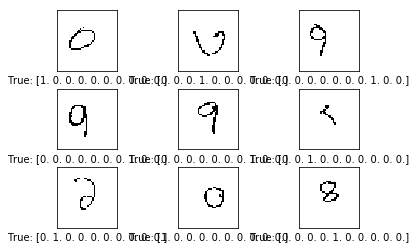

In [44]:
images = x_train[870:879,:,:,:]
cls_true = y_train[870:879,:]
plot_images(images=images, cls_true=cls_true)

In [45]:
np.shape(x_train)

(55267, 40, 40, 1)